## COMP5625M Practical Assessment - Deep Learning [100 Marks]


<div class="logos"><img src="Comp5625M_logo.jpg" width="220px" align="right"></div>

This assessment is divided into two parts:
> 1. Image classification using DNN and CNN [70 Marks]
> 2. Use of RNN to predict texts for image captioning [30 Marks]

The maximum number of marks for each part is shown in the section headers. As indicated in the main heading above, the overall assessment carries a maximum of 100 marks.

This summative assessment is weighted 50% of the final grade for the module.


### Motivation 

Through this coursework, you will:

> 1. Understand and implement your first deep neural network and convolutional neural network (CNN) and see how these can be used for classification problem 
> 2. Practice building, evaluating, and finetuning your CNN on an image dataset from development to testing stage. 
> 3. You will learn to tackle overfitting problem using strategies such as data augmentation and drop out.
> 4. Compare your model performance and accuracy with others, such as the leaderboard on Kaggle
> 5. Use RNNs to predict the caption of an image from established word vocabularies
> 6. Understand and visualise text predictions for a given image.


### Setup and resources 

You must work using this provided template notebook.

Having a GPU will speed up the training process. See the provided document on Minerva about setting up a working environment for various ways to access a GPU.

Please implement the coursework using **Python and PyTorch**, and refer to the notebooks and exercises provided.


### Submission

Please submit the following:

> 1. Your completed Jupyter notebook file, without removing anything in the template, in **.ipynb format.**
> 2. The **.html version** of your notebook; File > Download as > HTML (.html). Check that all cells have been run and all outputs (including all graphs you would like to be marked) displayed in the .html for marking.
> 3. Your selected image from section 2.4.2 "Failure analysis"

Final note:

> **Please display everything that you would like to be marked. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


Your student username (for example, ```sc15jb```): 

ml222xc

Your full name: 

Xinyun Chen

### Part I: Image Classification [70 marks]

#### Dataset
This coursework will use a subset of images from Tiny ImageNet, which is a subset of the [ImageNet dataset](https://www.image-net.org/update-mar-11-2021.php). Our subset of Tiny ImageNet contains **30 different categories**, we will refer to it as TinyImageNet30. The training set has 450 resized images (64x64 pixels) for each category (13,500 images in total). You can download the training and test set from the Kaggle website:

>[Direct access of data is possible by clicking here, please use your university email to access this](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/ESF87mN6kelIkjdISkaRow8BublW27jB-P8eWV6Rr4rxtw?e=SPASDB)

>[To submit your results on the Kaggle competition. You can also access data here](https://www.kaggle.com/t/9105198471a3490d9057026d27d8a711)

To access the dataset, you will need an account on the Kaggle website. Even if you have an existing Kaggle account, please carefully adhere to these instructions, or we may not be able to locate your entries:

> 1. Use your **university email** to register a new account.
> 2. Set your **Kaggle account NAME** to your university username, for example, ``sc15jb`` (see the ``note`` below)

``Note:`` If the name is already taken in the Kaggle then please use a similar pseudo name and add a note in your submission with the name you have used in the Kaggle. 

#### Submitting your test result to Kaggle leaderboard 
The class Kaggle competition also includes a blind test set, which will be used in Question 1 for evaluating your custom model's performance on a test set. The competition website will compute the test set accuracy, as well as position your model on the class leaderboard. More information is provided in the related section below.


## Required packages

[1] [numpy](http://www.numpy.org) is package for scientific computing with python

[2] [h5py](http://www.h5py.org) is package to interact with compactly stored dataset

[3] [matplotlib](http://matplotlib.org) can be used for plotting graphs in python

[4] [pytorch](https://pytorch.org/docs/stable/index.html) is library widely used for bulding deep-learning frameworks

Feel free to add to this section as needed some examples for importing some libraries is provided for you below.

You may need to install these packages using [pip](https://pypi.org/project/opencv-python/) or [conda](https://anaconda.org/conda-forge/opencv).

In [213]:
import cv2
import math

import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.hub import load_state_dict_from_url

from PIL import Image
import matplotlib.pyplot as plt

!pip install numpy
!pip install h5py
!pip install matplotlib
!pip install torch torchvision
!pip install natsort

In [214]:
# always check your version
print(torch.__version__)
if torch.cuda.is_available(): device = torch.device('cuda')
else: device = torch.device('cpu') 
print(device)

1.13.1+cu117
cuda


One challenge of building a deep learning model is to choose an architecture that can learn the features in the dataset without being unnecessarily complex. The first part of the coursework involves building a CNN and training it on TinyImageNet30. 

### **Overview of image classification:**

**1. Function implementation** [14 marks]

*   **1.1** PyTorch ```Dataset``` and ```DataLoader``` classes (4 marks)
*   **1.2** PyTorch ```Model``` class for a simple MLP model (4 marks)
*   **1.3** PyTorch ```Model``` class for a simple CNN model (6 marks)

**2. Model training** [30 marks]
*   **2.1** Training on TinyImageNet30 dataset (6 marks)
*   **2.2** Generating confusion matrices and ROC curves (6 marks)
*   **2.3** Strategies for tackling overfitting (18 marks)
    *   **2.3.1** Data augmentation
    *   **2.3.2** Dropout
    *   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)
            
**3. Model testing** [10 marks]
*   **3.1**   Testing your final model in (2) on test set - code to do this (4 marks)
*   **3.2**   Uploading your result to Kaggle  (6 marks)

**4. Model Fine-tuning on CIFAR10 dataset** [16 marks]
*   **4.1** Fine-tuning your model (initialise your model with pretrained weights from (2)) (6 marks)
*   **4.2** Fine-tuning model with frozen base convolution layers (6 marks)
*   **4.3** Compare complete model retraining with pretrained weights and with frozen layers. Comment on what you observe. (4 marks) 


<!-- **5. Model comparison** [16 marks]
*   **5.1**   Load pretrained AlexNet and finetune on TinyImageNet30 until model convergence (8 marks)
*   **5.2**   Compare the results of your model with pretrained AlexNet on the same validation set. Provide performance values (loss graph, confusion matrix, top-1 accuracy, execution time) (8 marks) -->
<!-- 
**6. Interpretation of results** (14 marks)
*   **6.1** Implement grad-CAM for your model and AlexNet (6 marks)
*   **6.2** Visualise and compare your results from your model and AlexNet (4 marks)
*   **6.3** Provide comment on (4 marks)
    - why the network predictions were correct or not correct in your predictions? 
    - what can you do to improve your results further?

**7. Residual connection for deeper network** (9 marks)
*   **7.1** Implement a few residual layers in AlexNet and retrain on TinyImageNet30. You can change network size if you wish. (6 marks)
*   **7.2** Comment on why such connections are important and why this impacted your results in terms of loss and accuracy (if it did!) (3 marks)

**Quality of your report** (2 marks) -->


## 1 Function implementations [14 marks]


### 1.1 Dataset class (4 marks)

Write a PyTorch ```Dataset``` class (an example [here](https://www.askpython.com/python-modules/pytorch-custom-datasets) for reference) which loads the TinyImage30 dataset and ```DataLoaders``` for training and validation sets.

In [215]:
# TO COMPLETE
# Imports
import os
from PIL import Image
from torch.utils.data import Dataset
from natsort import natsorted
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

from torch.utils.data import random_split
from sklearn.metrics import roc_curve, auc
from torch.utils.data import random_split, ConcatDataset, DataLoader

> Write a PyTorch Dataset class to loads the TinyImage30 dataset

In [216]:
class TinyImage30Dataset(Dataset):
    def __init__(self, root_dir, label_dir, label_to_index, transform):
        #set the path
        self.root_dir = root_dir
        self.label_dir = label_dir
        self.path = os.path.join(self.root_dir,self.label_dir)
        self.all_img_list = os.listdir(self.path)
        self.label_to_index = label_to_index
        self.transform = transform

    
    def __getitem__(self, idx):
        img_name = self.all_img_list[idx]
        img_item_path = os.path.join(self.root_dir,self.label_dir, img_name )
        img = Image.open(img_item_path)
        img = img.convert("RGB")
        img = self.transform(img)
        label = self.label_to_index[self.label_dir]
        return img,label
    
    def __len__(self):
        return len(self.all_img_list)

> For the training data, I divided it directly into the training set and the verification set according to the ratio of 8:2(The requirement in 2.1).Once you use ```def create_datasets_and_loaders(root_path, transform, batch_size)```, you will be able to get the training set dataset instance, validation set dataset instance, and their dataloader form contents.

> Besides, a ```label_to_index = {}``` can help you change the label(folder name) to the class index(number), and this will be used in ```TinyImage30Dataset```.

In [217]:
def create_datasets_and_loaders(root_path, transform, batch_size):
    # get all label
    #set the root path
    all_inroot = os.listdir(root_path) #all entry in the root path
    all_label = [entry for entry in all_inroot if os.path.isdir(os.path.join(root_path, entry))]

    # create label to index dictionary
    label_to_index = {}
    for index, label in enumerate(all_label):
        label_to_index[label] = index

    # create dataset list
    train_dataset_list = []
    val_dataset_list = []
    all_dataset_list = []

    # create dataset with TinyImage30Dataset clas
    for label in all_label:
        dataset = TinyImage30Dataset(root_path, label, label_to_index, transform = transform)
        total_size = len(dataset)
        val_size = int(0.2 * total_size)
        train_size = int(0.8 * total_size)
        all_dataset_list.append(dataset)
        train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
        train_dataset_list.append(train_dataset)
        val_dataset_list.append(val_dataset)
    
    # concat dataset
    train_dataset = ConcatDataset(train_dataset_list)
    val_dataset = ConcatDataset(val_dataset_list)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
    
    return train_dataset, val_dataset, train_loader, val_loader

In [218]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.4,contrast=0.4,saturation=0.4),
    transforms.ToTensor(),           
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
  
])
root_path = 'data_set/train_set/'
train_dataset, val_dataset, train_loader, val_loader = create_datasets_and_loaders(root_path, transform, 32)


>  just test wheather the train_loader could work, and show the samples for train_loader

the shape of each picture: torch.Size([3, 64, 64])


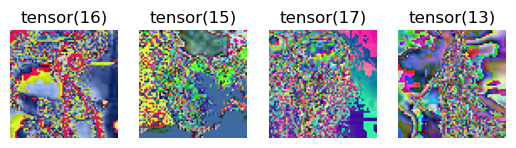

In [223]:
sample=next(iter(train_loader))

print("the shape of each picture: {}".format(sample[0][0].shape))
for sample,i in zip(train_loader,range(4)):
    image = transforms.ToPILImage()(sample[0][0])
    ax = plt.subplot(1,4,i+1)
    ax.axis('off')
    plt.imshow(image)
    ax.set_title(sample[1][0])

### 1.2 Define a MLP model class (4 marks)

<u>Create a new model class using a combination of:</u>
- Input Units
- Hidden Units
- Output Units
- Activation functions
- Loss function
- Optimiser

In [221]:
# TO COMPLETE
# define a MLP Model class
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3*64*64,128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,30)
        self.softmax = nn.Softmax(dim=1)
 
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return self.softmax(x)

# Initialize a MLP instance
mlp = MLP()
  
# Define the loss function and optimizer
loss_function_mlp = nn.CrossEntropyLoss()
optimizer_mlp = torch.optim.Adam(mlp.parameters(), lr=1e-4)

print(mlp)

MLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=12288, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=30, bias=True)
  (softmax): Softmax(dim=1)
)


### 1.3 Define a CNN model class (6 marks)

<u>Create a new model class using a combination of:</u>
- Convolution layers
- Activation functions (e.g. ReLU)
- Maxpooling layers
- Fully connected layers 
- Loss function
- Optimiser

*Please note that the network should be at least a few layers for the model to perform well.*

In [224]:
import torch
import torch.nn as nn
import torch.optim as optim

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=2)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2, stride=1, padding=1)
        self.maxpool4 = nn.MaxPool2d(kernel_size=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 10 * 10, 512)
        self.relu = nn.ReLU()
        self.batchnorm1=nn.BatchNorm2d(32)
        self.batchnorm2=nn.BatchNorm2d(64)
        self.fc2 = nn.Linear(512, 128)
        self.drop = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(128, 30)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(self.batchnorm1(x))
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu(self.batchnorm2(x))
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.maxpool3(x)
        x = self.conv4(x)
        x = self.maxpool4(x)
        x = self.relu(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.drop(x)
        x = self.fc3(x)
        return x

# Define loss function
loss_function_cnn = nn.CrossEntropyLoss()

# Define optimizer
optimizer_cnn = optim.Adam(CNNModel().parameters(), lr=0.001)

cnnmodel = CNNModel()

#j ust check the network whether can work
print(cnnmodel)
input = torch.ones(64,3,64,64)# batchsize,channel,width,height
output = cnnmodel(input)
print(output.shape)


CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (maxpool4): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=25600, out_features=512, bias=True)
  (relu): ReLU()
  (batchnorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc

## 2 Model training [30 marks]


### 2.1 Train both MLP and CNN model - show loss and accuracy graphs side by side (6 marks)

Train your model on the TinyImageNet30 dataset. Split the data into train and validation sets to determine when to stop training. Use seed at 0 for reproducibility and test_ratio=0.2 (validation data)

Display the graph of training and validation loss over epochs and accuracy over epochs to show how you determined the optimal number of training epochs. A top-*k* accuracy implementation is provided for you below.

> Please leave the graph clearly displayed. Please use the same graph to plot graphs for both train and validation.


> The training set and validation set have been divided according to the requirements in question 1.1

In [225]:
# (HelperDL function) -- Define top-*k* accuracy (**new**)
def topk_accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

> ```stats(loader, net, loss_fn) ```help to compute the mean Loss on validation set(running_loss/n) and the accuracy on validation set(correct/total).

In [226]:
def stats(loader, net, loss_fn):
    correct = 0
    total = 0
    running_loss = 0
    n = 0    # counter for number of minibatches
    with torch.no_grad():
        for data in loader:
            images, labels = data

            #to work with gpu you will need to load data and labels to gpu
            images = images.to(device)
            labels = labels.to(device)

            outputs = net(images)

            # accumulate loss
            running_loss += loss_fn(outputs, labels).item()
            n += 1

            # accumulate data for accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)    # add in the number of labels in this minibatch
            correct += (predicted == labels).sum().item()  # add in the number of correct labels
            
            
    return running_loss/n, correct/total

> An ```MLP model``` is run here. ```mlp_saveCkpt``` specifies the checkpoint save location of the model during the training process, which can save the state of the model during the training process. 4 important values are stored through ```mlp_statsrec```, including: training loss, training accuracy, validation loss and validation accuracy.

> In addition, considering that model training will be overfitted, this can be reflected at the loss of the train dataset decreasing while the loss of the validation dataset increases. Therefore, an early stopping threshold (```val_maxloss_increas```e) is set here: compared with the lower validation set loss (```last_validation_loss```), training is stopped earlier if the validation set loss is continuously higher than it for ```val_maxloss_increase``` (15) epochs.

In [228]:
#TO COMPLETE --> Running your MLP model class
torch.manual_seed(0)

#train
epoch = 300

# create directory to save your checkpoints
mlp_results_path = 'cw 1 result/mlp_results/'
os.makedirs(mlp_results_path, exist_ok = True)
mlp_saveCkpt = mlp_results_path + 'mlp300epochs.pt'

mlp_train_step = 0


mlp_model=MLP().to(device) 

loss_function_mlp = nn.CrossEntropyLoss()
optimizer_mlp = optim.SGD(mlp_model.parameters(), lr=0.001, momentum=0.9)

val_maxloss_increase = 15
val_consecutive_increases = 0
last_validation_loss = float('inf') 

mlp_statsrec = np.zeros((4,epoch))


for i in range(epoch):
    mlp_correct_train = 0          # number of examples predicted correctly (for accuracy)
    mlp_total_train = 0            # number of examples
    mlp_running_loss = 0.0   # accumulated loss (for mean loss)
    mlp_train_n = 0                

    for data in train_loader:#each batch data
        mlp_img, mlp_label = data
        mlp_img = mlp_img.to(device)
        mlp_label = mlp_label.to(device)

        optimizer_mlp.zero_grad()
        
        outputs_mlp = mlp_model(mlp_img)
        loss_mlp = loss_function_mlp(outputs_mlp, mlp_label) 
        loss_mlp.backward()
        optimizer_mlp.step()
        
        mlp_train_step = mlp_train_step +1
        
        # accumulate loss
        mlp_running_loss += loss_mlp.item()
        mlp_train_n = mlp_train_n+1
        _, mlp_predicted = torch.max(outputs_mlp.data, 1)
        mlp_total_train += mlp_label.size(0)
        mlp_correct_train += (mlp_predicted == mlp_label).sum().item()
              
    mlp_ltrn = mlp_running_loss / mlp_train_n
    mlp_atrn = mlp_correct_train / mlp_total_train
    mlp_ltst, mlp_atst = stats(val_loader, mlp_model, loss_function_mlp)#val loss and val accuracy
    
    if mlp_ltst > last_validation_loss:
        val_consecutive_increases += 1
    else:
        last_validation_loss = mlp_ltst
        val_consecutive_increases = 0
    
    # stop
    if val_consecutive_increases >= val_maxloss_increase:
        print("Validation loss has a consecutive increased >= the max {}".format(val_consecutive_increases))
        break
    
    mlp_statsrec[:,i] = (mlp_ltrn, mlp_atrn, mlp_ltst, mlp_atst)
    print(f"epoch: {i} training loss: {mlp_ltrn: .3f} training accuracy: {mlp_atrn: .1%}  validation loss: {mlp_ltst: .3f} validation accuracy: {mlp_atst: .1%}")
torch.save({"state_dict": mlp_model.state_dict(), "stats": mlp_statsrec}, mlp_saveCkpt)

    
    

epoch: 0 training loss:  3.400 training accuracy:  4.9%  validation loss:  3.399 validation accuracy:  6.1%
epoch: 1 training loss:  3.398 training accuracy:  6.3%  validation loss:  3.395 validation accuracy:  6.7%
epoch: 2 training loss:  3.388 training accuracy:  7.5%  validation loss:  3.378 validation accuracy:  7.5%
epoch: 3 training loss:  3.373 training accuracy:  7.5%  validation loss:  3.369 validation accuracy:  7.8%
epoch: 4 training loss:  3.366 training accuracy:  7.9%  validation loss:  3.363 validation accuracy:  7.5%
epoch: 5 training loss:  3.364 training accuracy:  7.9%  validation loss:  3.360 validation accuracy:  8.1%
epoch: 6 training loss:  3.361 training accuracy:  8.6%  validation loss:  3.359 validation accuracy:  9.1%
epoch: 7 training loss:  3.358 training accuracy:  9.3%  validation loss:  3.355 validation accuracy:  9.6%
epoch: 8 training loss:  3.355 training accuracy:  10.1%  validation loss:  3.352 validation accuracy:  10.9%
epoch: 9 training loss:  3

> Plot image using ```mlp_statsrec```.

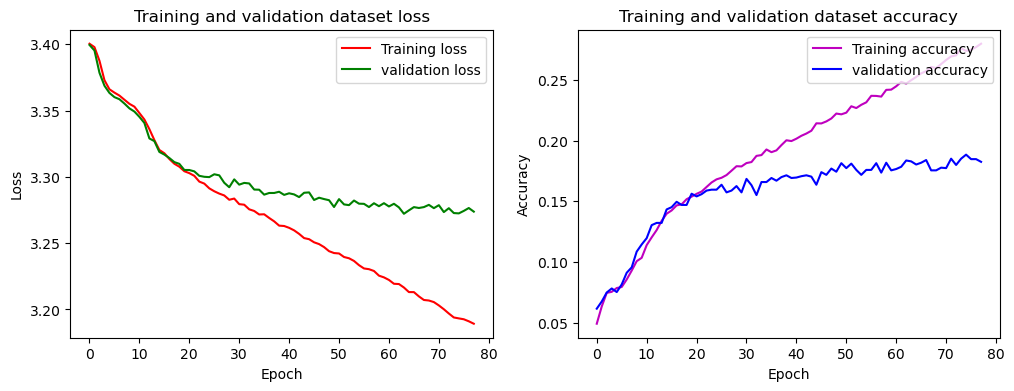

In [229]:
data = torch.load(mlp_saveCkpt, map_location=device)
mlp_statsrec = data["stats"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

#loss
ax1.plot(mlp_statsrec[0][:i], 'r', label = 'Training loss', )
ax1.plot(mlp_statsrec[2][:i], 'g', label = 'validation loss' )
ax1.legend(loc='upper right')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and validation dataset loss')


ax2.plot(mlp_statsrec[1][:i], 'm', label = 'Training accuracy')
ax2.plot(mlp_statsrec[3][:i], 'b', label = 'validation accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')
ax2.set_title('Training and validation dataset accuracy')

plt.show()


> The training process of the CNN model and the process of drawing images are similar to MLP

In [230]:
#TO COMPLETE --> Running your CNN model class
torch.manual_seed(0)

#train epoch
cnn_epoch = 300

#set path
cnn_results_path = 'cw 1 result/cnn_results/'
os.makedirs(cnn_results_path, exist_ok = True)
cnn_saveCkpt = cnn_results_path + 'cnn300epochs.pt'

cnn_model = CNNModel().to(device) 

loss_function_cnn = nn.CrossEntropyLoss()
optimizer_cnn = optim.SGD(cnn_model.parameters(), lr=0.001, momentum=0.9)

cnn_train_step = 0
cnn_val_maxloss_increase = 12
cnn_val_consecutive_increases = 0
cnn_last_validation_loss = float('inf') 
cnn_statsrec = np.zeros((4,cnn_epoch))

#train
for cnn_i in range(cnn_epoch):
    cnn_correct_train = 0          # number of examples predicted correctly (for accuracy)
    cnn_total_train = 0            # number of examples
    cnn_running_loss = 0.0   # accumulated loss (for mean loss)
    cnn_train_n = 0                # number of minibatches

    for data in train_loader:#each batch data
        cnn_img, cnn_label = data
        cnn_img = cnn_img.to(device)
        cnn_label = cnn_label.to(device)

        optimizer_cnn.zero_grad()
        
        cnn_outputs = cnn_model(cnn_img)
        cnn_loss = loss_function_cnn(cnn_outputs, cnn_label) 
        cnn_loss.backward()
        optimizer_cnn.step()
        
        cnn_train_step = cnn_train_step +1
        
        # accumulate loss
        cnn_running_loss += cnn_loss.item()
        cnn_train_n = cnn_train_n + 1
        _, cnn_predicted = torch.max(cnn_outputs.data, 1)
        cnn_total_train += cnn_label.size(0)
        cnn_correct_train += (cnn_predicted == cnn_label).sum().item()
              
    cnn_ltrn = cnn_running_loss / cnn_train_n
    cnn_atrn = cnn_correct_train / cnn_total_train
    cnn_ltst, cnn_atst = stats(val_loader, cnn_model, loss_function_cnn)#val loss and val accuracy
    
    if cnn_ltst > cnn_last_validation_loss:
        cnn_val_consecutive_increases += 1
    else:
        cnn_last_validation_loss = cnn_ltst
        cnn_val_consecutive_increases = 0
    
    # stop
    if cnn_val_consecutive_increases  >= cnn_val_maxloss_increase:
        print("Validation loss has a consecutive increased >= the max {}".format(cnn_val_consecutive_increases))
        break
    
    cnn_statsrec[:,cnn_i] = (cnn_ltrn, cnn_atrn, cnn_ltst, cnn_atst)
    print(f"epoch: {cnn_i} training loss: {cnn_ltrn: .3f} training accuracy: {cnn_atrn: .1%}  validation loss: {cnn_ltst: .3f} validation accuracy: {cnn_atst: .1%}")
torch.save({"state_dict": cnn_model.state_dict(), "stats": cnn_statsrec}, cnn_saveCkpt)



epoch: 0 training loss:  3.387 training accuracy:  4.8%  validation loss:  3.353 validation accuracy:  8.4%
epoch: 1 training loss:  3.236 training accuracy:  10.5%  validation loss:  3.101 validation accuracy:  13.0%
epoch: 2 training loss:  2.993 training accuracy:  14.6%  validation loss:  2.841 validation accuracy:  18.3%
epoch: 3 training loss:  2.794 training accuracy:  20.0%  validation loss:  2.690 validation accuracy:  23.0%
epoch: 4 training loss:  2.665 training accuracy:  23.0%  validation loss:  2.622 validation accuracy:  24.6%
epoch: 5 training loss:  2.557 training accuracy:  25.7%  validation loss:  2.488 validation accuracy:  28.7%
epoch: 6 training loss:  2.477 training accuracy:  28.1%  validation loss:  2.453 validation accuracy:  28.0%
epoch: 7 training loss:  2.410 training accuracy:  28.6%  validation loss:  2.375 validation accuracy:  31.1%
epoch: 8 training loss:  2.323 training accuracy:  31.8%  validation loss:  2.358 validation accuracy:  31.2%
epoch: 9 tra

> Plot image using cnn_statsrec

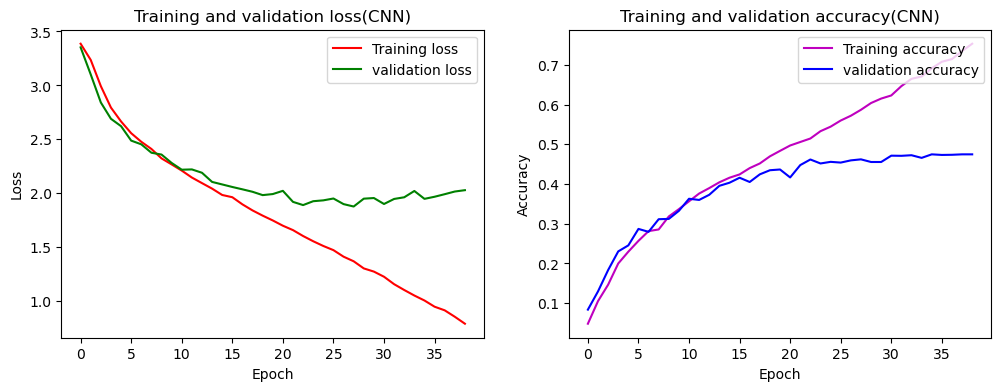

In [231]:
# Your graph
cnn_results_path = 'cw 1 result/cnn_results/'
os.makedirs(cnn_results_path, exist_ok = True)
cnn_saveCkpt = cnn_results_path + 'cnn300epochs.pt'

data = torch.load(cnn_saveCkpt, map_location=device)
cnn_statsrec = data["stats"]

cnn_fig, (cnn_ax1, cnn_ax2) = plt.subplots(1, 2, figsize=(12, 4))

#loss
cnn_ax1.plot(cnn_statsrec[0][:cnn_i], 'r', label = 'Training loss', )
cnn_ax1.plot(cnn_statsrec[2][:cnn_i], 'g', label = 'validation loss' )
cnn_ax1.legend(loc='upper right')
cnn_ax1.set_xlabel('Epoch')
cnn_ax1.set_ylabel('Loss')
cnn_ax1.set_title('Training and validation loss(CNN)')


cnn_ax2.plot(cnn_statsrec[1][:cnn_i], 'm', label = 'Training accuracy')
cnn_ax2.plot(cnn_statsrec[3][:cnn_i], 'b', label = 'validation accuracy')
cnn_ax2.set_xlabel('Epoch')
cnn_ax2.set_ylabel('Accuracy')
cnn_ax2.legend(loc='upper right')
cnn_ax2.set_title('Training and validation accuracy(CNN)')


plt.show()


> Comment on your model and the results you have obtained. This should include the number of parameters for each of your models and briefly explain why one should use CNN over MLP for the image classification problem.

---
> 1. Comment on your model and the results you have obtained.

> (1)In the model I designed, the MLP model is relatively simple, mainly composed of fully connected layers and activation functions. The CNN I designed is much more complex than it, with more layers, mainly composed of convolutional layers (Conv2d), max pooling layers (MaxPool2d), flattening layers (Flatten), fully connected layers (Linear), activation functions (ReLU) , batch normalization layers (BatchNorm2d), and dropout layers (Dropout). Comparing the parameters of the model, it is also more complex than MLP.

> (2)During the training process, the CNN model converges faster and has better results than the MLP model. It has relatively high accuracy and low loss value for the verification dataset and train dataset.

---

> 2. Using CNN is more suitable for image classification. 

> (1)From the model architecture, CNN has convolutional layers, which use convolution kernels of different sizes to process images, which can more effectively obtain the characteristics of the input image. In addition, there are some max pooling layers, which can change the size of the images, making it suitable for image classification tasks. 

> (2)Judging from the results, CNN can improve the accuracy of the training set and verification set faster and reduce loss than the MLP model. Moreover, CNNs tend to converge faster compared to MLPs

### 2.2 Generating confusion matrix and ROC curves (6 marks)
- Use your CNN architecture with best accuracy to generate two confusion matrices, one for the training set and another for the validation set. Remember to use the whole validation and training sets, and to include all your relevant code. Display the confusion matrices in a meaningful way which clearly indicates what percentage of the data is represented in each position.
- Display an ROC curve for the two top and two bottom classes with area under the curve

In [20]:
# Your code here!
from sklearn.metrics import confusion_matrix
import seaborn as sns

checkpoint = torch.load(cnn_saveCkpt)
cnn_model_con = CNNModel().to(device)
cnn_model_con.load_state_dict(checkpoint["state_dict"])#Load the previously parameters (state_dict) into the current CNN model

train_true = []
train_predict = []
val_true = []
val_predict = []

for data in train_loader:
    img, label = data
    img = img.to(device)
    label = label.to(device)
    outputs = cnn_model_con(img)
    _, predicted = torch.max(outputs.data, 1)
    train_true.extend(label.tolist()) 
    train_predict.extend(predicted.tolist()) 

for data in val_loader:
    img, label = data
    img = img.to(device)
    label = label.to(device)
    outputs = cnn_model_con(img)
    _, predicted = torch.max(outputs.data, 1)
    val_true.extend(label.tolist())  
    val_predict.extend(predicted.tolist())  


Text(0.5, 1.0, 'Validation Set Confusion Matrix')

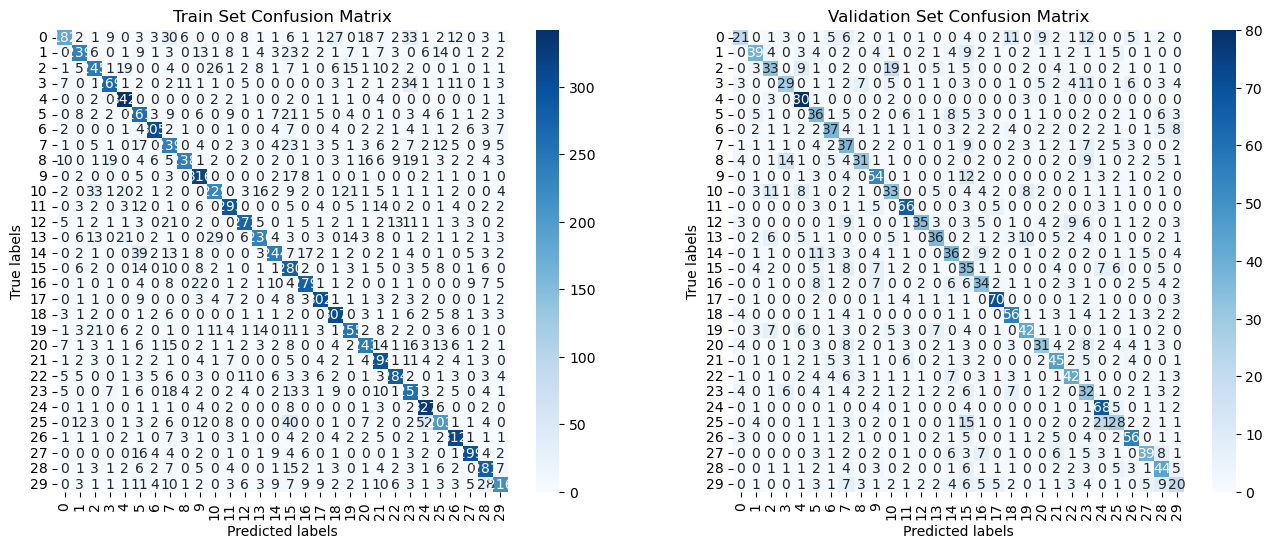

In [24]:
train_cm = confusion_matrix(train_true, train_predict)
val_cm = confusion_matrix(val_true, val_predict)


plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Train Set Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Validation Set Confusion Matrix')

In [11]:
# ROC 
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


cnn_results_path = 'cw 1 result/cnn_results/'
os.makedirs(cnn_results_path, exist_ok = True)
cnn_saveCkpt = cnn_results_path + 'cnn500epochs.pt'

checkpoint = torch.load(cnn_saveCkpt)
# cnn_model_con = CNNModel().to(device)
cnn_model_con = CNNModel()
cnn_model_con.load_state_dict(checkpoint["state_dict"])#Load the previously parameters (state_dict) into the current CNN model

train_true_roc = []
train_predict_roc = []
val_true_roc = []
val_predict_roc = []

for data in train_loader:
    img, label = data
#     img = img.to(device)
#     label = label.to(device)
    outputs = cnn_model_con(img)
    softmax = nn.Softmax(dim=1)
    train_predict_roc.extend(softmax(outputs).tolist())
    _, predicted = torch.max(outputs.data, 1)
    train_true_roc.extend(label.tolist()) 

for data in val_loader:
    img, label = data
#     img = img.to(device)
#     label = label.to(device)
    outputs = cnn_model_con(img)
    softmax = nn.Softmax(dim=1)
    val_predict_roc.extend(softmax(outputs).tolist())
    _, predicted = torch.max(outputs.data, 1)
    val_true_roc.extend(label.tolist())  



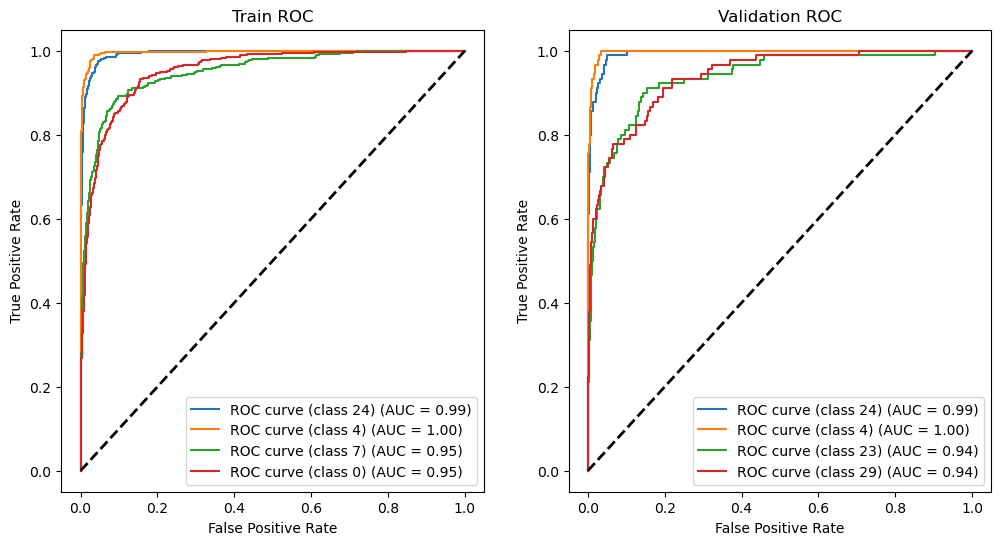

In [14]:
#conver to arry
train_true_roc = np.array(train_true_roc)
train_true_roc = label_binarize(train_true_roc, classes=np.arange(30))
train_predict_roc = np.array(train_predict_roc)

val_true_roc = np.array(val_true_roc)
val_true_roc = label_binarize(val_true_roc, classes=np.arange(30))
val_predict_roc = np.array(val_predict_roc)


train_fpr = dict()
train_tpr = dict()
train_auc = dict()

val_fpr = dict()
val_tpr = dict()
val_auc = dict()

class_num =  30 #30 classes

for i in range(class_num): 
    train_fpr[i], train_tpr[i], _ = roc_curve(train_true_roc[:, i], train_predict_roc[:, i])
    train_auc[i] = auc(train_fpr[i], train_tpr[i])

    val_fpr[i], val_tpr[i], _ = roc_curve(val_true_roc[:, i], val_predict_roc[:, i])
    val_auc[i] = auc(val_fpr[i], val_tpr[i])


# get the top and bottom two classes
train_sorted_classes = sorted(range(class_num), key=lambda k: train_auc[k])
train_top_classes = train_sorted_classes[-2:]
train_bottom_classes = train_sorted_classes[:2]

val_sorted_classes = sorted(range(class_num), key=lambda k: val_auc[k])
val_top_classes = val_sorted_classes[-2:]
val_bottom_classes = val_sorted_classes[:2]

# plot
plt.figure(figsize=(12, 6))


# plot train 
plt.subplot(1, 2, 1)
for i in train_top_classes:
    plt.plot(train_fpr[i], train_tpr[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(i, train_auc[i]))

for i in train_bottom_classes:
    plt.plot(train_fpr[i], train_tpr[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(i, train_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train ROC')
plt.legend(loc="lower right")

# 绘制验证集中最高的两个类别的ROC曲线
plt.subplot(1, 2, 2)
for i in val_top_classes:
    plt.plot(val_fpr[i], val_tpr[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(i, val_auc[i]))

for i in val_bottom_classes:
    plt.plot(val_fpr[i], val_tpr[i], label='ROC curve (class {}) (AUC = {:.2f})'.format(i, val_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation ROC')
plt.legend(loc="lower right")

plt.show()

### Redesign your CNN model (optional)
> This is optional and does not carry any marks. Often to tackle model underfitting we tend to make more complex network design. Depending on your observation, you can improve your model if you wish. 

In [ ]:
# Your code here (optional)

**Note: All questions below here relates to the CNN model only and not an MLP model! You are advised to use your final CNN model only for each of the questions below.**

### 2.3 Strategies for tackling overfitting (18 marks)
Using your (final) CNN model perform the strategies below to avoid overfitting problems. You can resuse the network weights from previous training, often referred to as ``fine tuning``. 
*   **2.3.1** Data augmentation
*   **2.3.2** Dropout
*   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)

> Plot loss and accuracy graphs per epoch side by side for each implemented strategy.

> To be convenience, the process of training the model and plot the graph are encapsulated into functions here.

> By calling ```train_model```, you can easily train and obtain the four important data( including: training loss, training accuracy, validation loss and validation accuracy by ```statsrec```) and return the actual training epoch value(```i```) since the training will be early stop by ```val_maxloss_increase```.


In [238]:
def train_model(model, train_loader, val_loader, epoch, val_maxloss_increase, save_path, lr):
    torch.manual_seed(0)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Using the device {}.".format(device))
    model.to(device)
    
    train_step = 0
    
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr, momentum=0.9)
    
    
    last_validation_loss = float('inf')
    val_consecutive_increases = 0
    statsrec = np.zeros((4, epoch))
    
    for i in range(epoch):
        correct_train = 0
        total_train = 0
        running_loss = 0.0
        train_n = 0
        
        for data in train_loader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_step += 1
            running_loss += loss.item()
            train_n += 1
            
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss_ltrn = running_loss / train_n
        train_accuracy_atrn = correct_train / total_train

        val_loss_ltst, val_accuracy_atst = stats(val_loader, model, loss_function)
        
        if val_loss_ltst > last_validation_loss:
            val_consecutive_increases += 1
        else:
            last_validation_loss = val_loss_ltst
            val_consecutive_increases = 0
        
        if val_consecutive_increases >= val_maxloss_increase:  # Early stopping condition
            print("Validation loss has consecutively increased >= the maximum for {} epochs".format(val_consecutive_increases))
            break
        
        statsrec[:, i] = (train_loss_ltrn, train_accuracy_atrn, val_loss_ltst, val_accuracy_atst)
        print(f"Epoch: {i}, Training Loss: {train_loss_ltrn:.3f}, Training Accuracy: {train_accuracy_atrn:.1%}, Validation Loss: {val_loss_ltst:.3f}, Validation Accuracy: {val_accuracy_atst:.1%}")

    # Save model checkpoint
    torch.save({"state_dict": model.state_dict(), "stats": statsrec}, save_path)
    
    return statsrec, i


> By calling ```plot_statsrec(statsrec, epoch)```, you can more quickly plot the loss values and accuracy on the validation set and training set.

In [247]:
import matplotlib.pyplot as plt

def plot_statsrec(statsrec, epoch):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Loss
    ax1.plot(statsrec[0][:epoch], 'r', label='Training Loss')
    ax1.plot(statsrec[2][:epoch], 'g', label='Validation Loss')
    ax1.legend(loc='upper right')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')

    # Accuracy
    ax2.plot(statsrec[1][:epoch], 'm', label='Training Accuracy')
    ax2.plot(statsrec[3][:epoch], 'b', label='Validation Accuracy')
    ax2.legend(loc='upper right')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Training and Validation Accuracy')

    plt.tight_layout()
    plt.show()


#### 2.3.1 Data augmentation (6 marks)

> Implement at least five different data augmentation techniques that should include both photometric and geometric augmentations. 

> Provide graphs and comment on what you observe.


The length of the train_dataset is 10800
the shape of each picture: torch.Size([3, 64, 64])


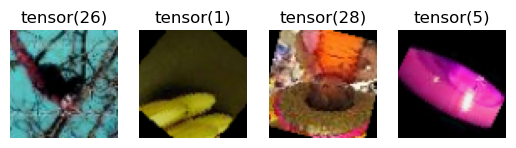

In [50]:
# Your code here!
transform_data_aug = transforms.Compose([
    #  photometric 
    transforms.RandomGrayscale(p=0.1),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, hue=0.2),
    
    #geometric
    transforms.RandomCrop(size=(60, 60)),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=45),
    transforms.Resize((64, 64)),
    transforms.ToTensor()

])

train_dataset_aug, val_dataset_aug, train_loader_aug, val_loader_aug = create_datasets_and_loaders(root_path, transform_data_aug, 32)

# the samples for train_loader
sample=next(iter(train_loader_aug))

print("the shape of each picture: {}".format(sample[0][0].shape))
for sample,i in zip(train_loader_aug,range(4)):
    image = transforms.ToPILImage()(sample[0][0])
    ax = plt.subplot(1,4,i+1)
    ax.axis('off')
    plt.imshow(image)
    ax.set_title(sample[1][0])

In [60]:
aug_results_path = 'cw 1 result/aug_results/' 
os.makedirs(aug_results_path, exist_ok = True) 
aug_saveCkpt = aug_results_path + 'aug50epochs.pt'

epoch = 300
val_maxloss_increase = 20
aug_statsrec = np.zeros((4, epoch))

aug_cnn_model = CNNModel().to(device)
aug_statsrec = train_model(aug_cnn_model, train_loader_aug, val_loader_aug, epoch, val_maxloss_increase, aug_saveCkpt,0.001)



Using the device cuda.
Epoch: 0, Training Loss: 3.397, Training Accuracy: 4.5%, Validation Loss: 3.388, Validation Accuracy: 4.1%
Epoch: 1, Training Loss: 3.347, Training Accuracy: 7.0%, Validation Loss: 3.283, Validation Accuracy: 8.1%
Epoch: 2, Training Loss: 3.212, Training Accuracy: 9.9%, Validation Loss: 3.129, Validation Accuracy: 12.0%
Epoch: 3, Training Loss: 3.044, Training Accuracy: 13.7%, Validation Loss: 3.009, Validation Accuracy: 13.7%
Epoch: 4, Training Loss: 2.953, Training Accuracy: 16.6%, Validation Loss: 2.927, Validation Accuracy: 16.9%
Epoch: 5, Training Loss: 2.884, Training Accuracy: 17.7%, Validation Loss: 2.860, Validation Accuracy: 18.2%
Epoch: 6, Training Loss: 2.837, Training Accuracy: 18.9%, Validation Loss: 2.852, Validation Accuracy: 17.1%
Epoch: 7, Training Loss: 2.795, Training Accuracy: 19.8%, Validation Loss: 2.814, Validation Accuracy: 18.5%
Epoch: 8, Training Loss: 2.772, Training Accuracy: 20.7%, Validation Loss: 2.802, Validation Accuracy: 20.1%
E

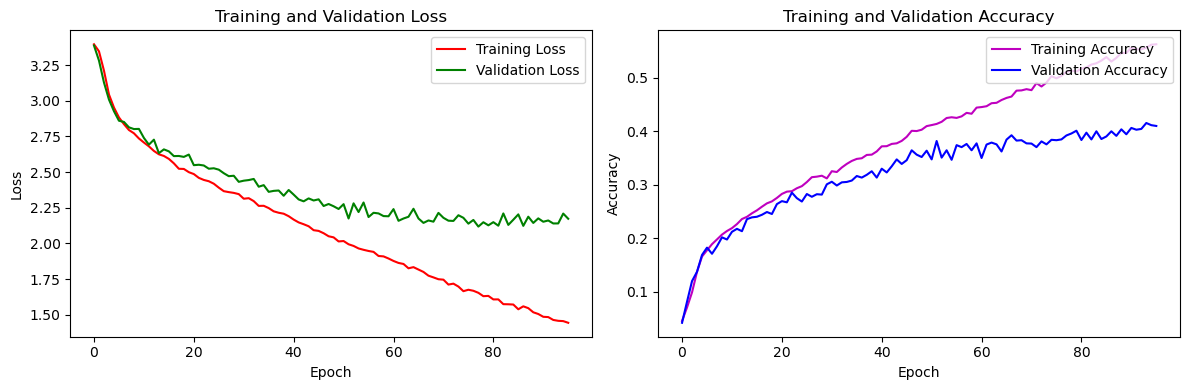

In [166]:
plot_statsrec(aug_statsrec, 96)

> Comment: Using data augmentation method, the training efficiency is relatively low, and it needs to reach 100 epochs to be close to the effect of the original CNN model.But compared to the previous graph, its verification set loss did not rise very fast, but was relatively gentle. The two curves of the validation set and the training set are also relatively close.

> Therefore, I think that although training using data augmentation methods will be slower and less efficient. But it can effectively reduce the risk of overfitting.

#### 2.3.2 Dropout (6 marks)

> Implement dropout in your model 

> Provide graphs and comment on your choice of proportion used.

In [327]:
# Your code here!
import torch
import torch.nn as nn
import torch.optim as optim

class CNNModel_with_dropout(nn.Module):
    def __init__(self):
        super(CNNModel_with_dropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=2)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=2, stride=1, padding=1)
        self.maxpool4 = nn.MaxPool2d(kernel_size=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(256 * 10 * 10, 512)
        self.relu = nn.ReLU()
        self.batchnorm1=nn.BatchNorm2d(32)
        self.batchnorm2=nn.BatchNorm2d(64)
        self.fc2 = nn.Linear(512, 128)
        self.drop = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(128, 30)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(self.batchnorm1(x))
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.relu(self.batchnorm2(x))
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.maxpool3(x)
        x = self.conv4(x)
        x = self.maxpool4(x)
        x = self.relu(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.drop(x)
        x = self.fc3(x)
        return x

# Define loss function
loss_function_cnn = nn.CrossEntropyLoss()

# Define optimizer
optimizer_cnn = optim.Adam(CNNModel().parameters(), lr=0.001)

cnnmodel = CNNModel()
print(cnnmodel)
input = torch.ones(64,3,64,64)#batchsize,channel,width,height
output = cnnmodel(input)
print(output.shape)#torch.Size([32, 30])


CNNModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (maxpool4): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=25600, out_features=512, bias=True)
  (relu): ReLU()
  (batchnorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc

In [56]:
dropout_results_path = 'cw 1 result/dropout_results/' 
os.makedirs(dropout_results_path, exist_ok = True) 
dropout_saveCkpt = dropout_results_path + 'drop300epochs.pt'

epoch = 300
drop_val_maxloss_increase = 8
aug_statsrec = np.zeros((4, epoch))

dropout_cnn_model = CNNModel_with_dropout().to(device)
dropout_statsrec = train_model(dropout_cnn_model, train_loader, val_loader, epoch, drop_val_maxloss_increase, dropout_saveCkpt,0.001)



Using the device cuda.
Epoch: 0, Training Loss: 3.399, Training Accuracy: 3.7%, Validation Loss: 3.391, Validation Accuracy: 4.9%
Epoch: 1, Training Loss: 3.363, Training Accuracy: 6.0%, Validation Loss: 3.309, Validation Accuracy: 6.9%
Epoch: 2, Training Loss: 3.253, Training Accuracy: 8.6%, Validation Loss: 3.188, Validation Accuracy: 9.0%
Epoch: 3, Training Loss: 3.129, Training Accuracy: 11.4%, Validation Loss: 3.050, Validation Accuracy: 13.1%
Epoch: 4, Training Loss: 3.005, Training Accuracy: 13.7%, Validation Loss: 2.928, Validation Accuracy: 15.3%
Epoch: 5, Training Loss: 2.898, Training Accuracy: 16.6%, Validation Loss: 2.852, Validation Accuracy: 17.3%
Epoch: 6, Training Loss: 2.805, Training Accuracy: 19.0%, Validation Loss: 2.790, Validation Accuracy: 17.3%
Epoch: 7, Training Loss: 2.737, Training Accuracy: 20.2%, Validation Loss: 2.715, Validation Accuracy: 20.7%
Epoch: 8, Training Loss: 2.680, Training Accuracy: 22.2%, Validation Loss: 2.703, Validation Accuracy: 22.0%
Ep

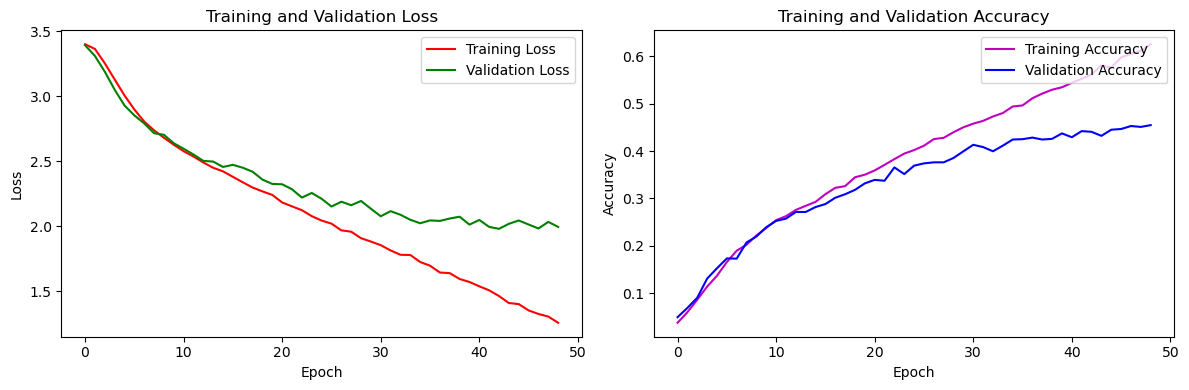

In [165]:
plot_statsrec(dropout_statsrec,49)

> Comment: Compared with the data enhancement method, the training dataset loss and training dataset accuracy changed faster by using the dropout method. The training speed will be moderate, slightly faster(fewer epoches) than the original CNN model with closing results.
In my opinion, choosing this method could be a good choice.

#### 2.3.3 Hyperparameter tuning (6 marks)

> Use learning rates [0.1, 0.001, 0.0001].

> Provide graphs each for loss and accuracy at three different learning rates in a single graph.

In [67]:
# Your code here!
lr_results_path = 'cw 1 result/lr_results/' 
os.makedirs(lr_results_path, exist_ok = True) 

epoch = 300
val_maxloss_increase = 15
learning_rates = [0.1, 0.001, 0.0001]

lr_statsrec = {}

for lr in learning_rates:
    # set the save path
    lr_saveCkpt = f'{lr_results_path}lr_{lr}_300epochs.pt'
    print("savepath: {}".format(lr_saveCkpt))

    # create new CNN model instance for each learning rate
    cnn_model = CNNModel().to(device)
    
    # train
    statsrec = train_model(cnn_model, train_loader, val_loader, epoch, val_maxloss_increase, lr_saveCkpt, lr)
    
    # Save stats record
    lr_statsrec[lr] = statsrec


savepath: cw 1 result/lr_results/lr_0.1_300epochs.pt
Using the device cuda.
Epoch: 0, Training Loss: 3.392, Training Accuracy: 4.5%, Validation Loss: 3.420, Validation Accuracy: 4.4%
Epoch: 1, Training Loss: 3.375, Training Accuracy: 3.9%, Validation Loss: 3.336, Validation Accuracy: 5.3%
Epoch: 2, Training Loss: 3.340, Training Accuracy: 4.9%, Validation Loss: 3.318, Validation Accuracy: 4.6%
Epoch: 3, Training Loss: 3.285, Training Accuracy: 6.2%, Validation Loss: 3.239, Validation Accuracy: 8.7%
Epoch: 4, Training Loss: 3.272, Training Accuracy: 7.0%, Validation Loss: 3.335, Validation Accuracy: 5.6%
Epoch: 5, Training Loss: 3.261, Training Accuracy: 7.2%, Validation Loss: 3.228, Validation Accuracy: 7.1%
Epoch: 6, Training Loss: 3.246, Training Accuracy: 7.3%, Validation Loss: 3.233, Validation Accuracy: 8.3%
Epoch: 7, Training Loss: 3.220, Training Accuracy: 8.1%, Validation Loss: 3.177, Validation Accuracy: 8.4%
Epoch: 8, Training Loss: 3.219, Training Accuracy: 8.3%, Validation 

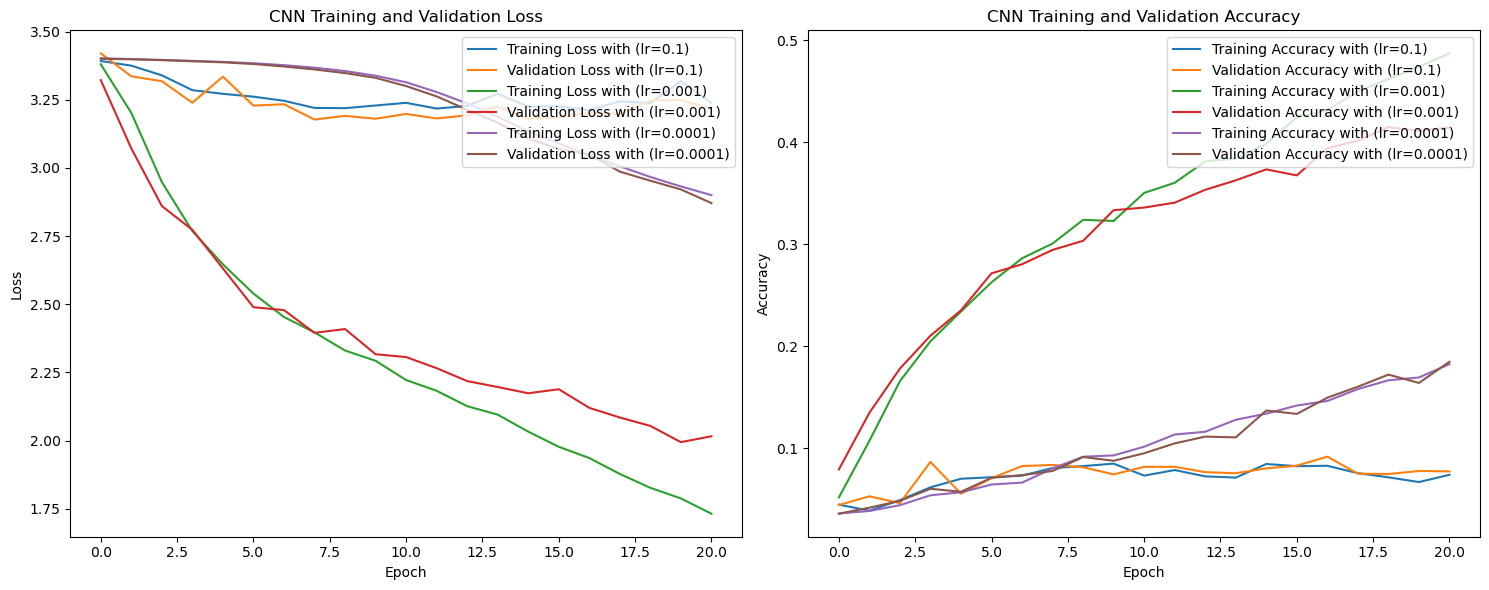

In [164]:
# Your graph
def plot_lr_stats(lr_stats, epochs):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    for lr, statsrec in lr_stats.items():
        # Loss
        ax1.plot(statsrec[0][:epochs], label=f'Training Loss with (lr={lr})')
        ax1.plot(statsrec[2][:epochs], label=f'Validation Loss with (lr={lr})')
        
        # Accuracy
        ax2.plot(statsrec[1][:epochs], label=f'Training Accuracy with (lr={lr})')
        ax2.plot(statsrec[3][:epochs], label=f'Validation Accuracy with (lr={lr})')

    ax1.legend(loc='upper right')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('CNN Training and Validation Loss')

    ax2.legend(loc='upper right')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('CNN Training and Validation Accuracy')

    plt.tight_layout()
    plt.show()

plot_lr_stats(lr_statsrec, 21)

> Comment: By observing the trend of the curve in the graph, we can find the following information: the higher the learning rate (lr=0.1), the worse the training effect. The higher the learning rate (lr=0.0001), the longer the training time is, and the results are similar to the original CNN. The learning rate is moderate(lr=0.001), which is almost the same as the original CNN. The training efficiency is higher and the effect is better. Thus, 0.001 might be a good number for learning rate.

### 3 Model testing [10 marks]
Online evaluation of your model performance on the test set. 

> Prepare the dataloader for the testset.

> Write evaluation code for writing predictions.

> Upload it to Kaggle submission page (6 marks)


#### 3.1 Test class and predictions (4 marks)

> Build a test class, prepare a test dataloader and generate predictions

Create a PyTorch ```Dataset``` for the unlabeled test data in the test_set folder of the Kaggle competition and generate predictions using your final model. Test data can be downloaded [here](https://www.kaggle.com/competitions/comp5623m-artificial-intelligence/data?select=test_set).

In [324]:
# build a test class for test_dataset
class TestDataset(Dataset):
    def __init__(self, dir_path, transform):
        self.data_dir = dir_path
        self.all_img_list = os.listdir(self.data_dir)
        self.transform = transform

    def __getitem__(self, idx):
        img_name = self.all_img_list[idx]
        img_item_path = os.path.join(self.data_dir, img_name)
        img = Image.open(img_item_path)
        img = img.convert('RGB')  
        img = self.transform(img)
        return img, img_name  # 返回图像数据和图像文件名

    def __len__(self):
        return len(self.all_img_list)


In [328]:
# Your code here!
import pandas as pd
dropout_results_path = 'cw 1 result/dropout_results/' 
os.makedirs(dropout_results_path, exist_ok = True) 
dropout_saveCkpt = dropout_results_path + 'drop300epochs.pt'
#create testdataset and  test dataloader
test_path = 'data_set/test/'
test_dataset = TestDataset(test_path, transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# final_cnn_model = CNNModel().to(device)

#set savepath
final_saveCkpt = dropout_saveCkpt
checkpoint_test = torch.load(final_saveCkpt)
final_cnn_model = CNNModel_with_dropout().to(device)

final_cnn_model.load_state_dict(checkpoint_test["state_dict"])

test_predictions = []
img_name_list = []

for img, img_name in test_loader:
    img = img.to(device)  
    with torch.no_grad():
        outputs = final_cnn_model(img)
        _, predicted = torch.max(outputs, 1)
        test_predictions.extend(predicted.cpu().numpy())
        img_name_list.extend(img_name)

print(len(img_name_list))
print(len(test_predictions))

test_result_df = pd.DataFrame({'Id': img_name_list, 'Category': test_predictions})
test_result_df


1500
1500


,Id,Category
0,003e8ac5_d95f.JPEG,1
1,00cc0f59_c28c.JPEG,28
2,012f1624_cf5f.JPEG,21
3,013b6458_ebee.JPEG,5
4,016330f6_4c40.JPEG,5
...,...,...
1495,ff151b7e_d09f.JPEG,0
1496,ff1e4f2b_5114.JPEG,20
1497,ff3c0445_3966.JPEG,24
1498,ff5b3540_6090.JPEG,1


#### 3.2 Prepare your submission and upload to Kaggle  (6 marks)

Save all test predictions to a CSV file and submit it to the private class Kaggle competition. **Please save your test CSV file submissions using your student username (the one with letters, e.g., ``sc15jb``, not the ID with only numbers)**, for example, `sc15jb.csv`. That will help us to identify your submissions.

The CSV file must contain only two columns: ‘Id’ and ‘Category’ (predicted class ID) as shown below:

```txt
Id,Category
28d0f5e9_373c.JPEG,2
bbe4895f_40bf.JPEG,18
```

The ‘Id’ column should include the name of the image. It is important to keep the same name as the one on the test set. Do not include any path, just the name of file (with extension). Your csv file must contain 1501 rows, one for each image on test set and 1 row for the headers. [To submit please click here.](https://www.kaggle.com/t/917fe52f6a3c4855880a24b34f26db07)

> You may submit multiple times. We will use your personal top entry for allocating marks for this [6 marks]. 


In [94]:
# Your code here! 
submit_file_name = "ml222xc.csv"
test_result_df.to_csv(submit_file_name, index=False)


### 4 Model Fine-tuning/transfer learning on CIFAR10 dataset  [16 marks]

Fine-tuning is a way of applying or utilizing transfer learning. It is a process that takes a model that has already been trained for one given task and then tunes or tweaks the model to make it perform a second similar task. You can perform fine-tuning in following fashion:

- Train an entire model: Start training model from scratch (large dataset, more computation)

- Train some layers, freeze others: Lower layer features are general (problem independent) while higher layer features are specific (problem dependent – freeze)

- Freeze convolution base and train only last FC layers (small dataset and lower computation) 

> **Configuring your dataset**
   - Download your dataset using ``torchvision.datasets.CIFAR10`` [explained here](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)
   - Split training dataset into training and validation set similar to above. *Note that the number of categories here is only 10*


> Divide each category according to the ratio of training set and validation set of 8:2, and then merge all categories to obtain two training sets and validation sets.

In [232]:
import torchvision

# Your code here! 
transform = transforms.Compose([
    transforms.RandomVerticalFlip(p=0.2),
    transforms.ColorJitter(brightness=0.3,contrast=0.3,saturation=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize((64, 64))
])

#download train_dataset
dataset_cif = torchvision.datasets.CIFAR10(root='cifar_dataset/', train=True, download=True, transform=transform)

#split into two subset for train and validation,8:2
train_datasets_cif = []
val_datasets_cif = []
for i in range(10):  #split on each classes
    class_subset = [data for data in dataset_cif if data[1] == i]  # each class
    class_size = len(class_subset)# all img for one class
    train_size = int(class_size*0.8)
    val_size = int(class_size*0.2)# compute the size of them
    train_dataset, val_dataset = random_split(class_subset, [train_size, val_size])#split into two set
    print("class size = {}, train_dataset len = {}, val_dataset len = {}".format(class_size,len(train_dataset),len(val_dataset)))
    train_datasets_cif.append(train_dataset)
    val_datasets_cif.append(val_dataset)

# concat the dataset
cif_train_dataset = torch.utils.data.ConcatDataset(train_datasets_cif)
cif_val_dataset = torch.utils.data.ConcatDataset(val_datasets_cif)

# get loader
train_loader_cif = DataLoader(cif_train_dataset, batch_size=32, shuffle=True)
val_loader_cif = DataLoader(cif_val_dataset, batch_size=32, shuffle=False)

Files already downloaded and verified
class size = 5000, train_dataset len = 4000, val_dataset len = 1000
class size = 5000, train_dataset len = 4000, val_dataset len = 1000
class size = 5000, train_dataset len = 4000, val_dataset len = 1000
class size = 5000, train_dataset len = 4000, val_dataset len = 1000
class size = 5000, train_dataset len = 4000, val_dataset len = 1000
class size = 5000, train_dataset len = 4000, val_dataset len = 1000
class size = 5000, train_dataset len = 4000, val_dataset len = 1000
class size = 5000, train_dataset len = 4000, val_dataset len = 1000
class size = 5000, train_dataset len = 4000, val_dataset len = 1000
class size = 5000, train_dataset len = 4000, val_dataset len = 1000


the shape of each picture: torch.Size([3, 64, 64])


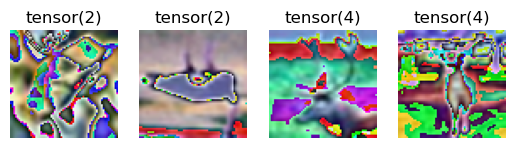

In [234]:
# show the samples for train_loader to check it can work
sample=next(iter(train_loader_cif))

print("the shape of each picture: {}".format(sample[0][0].shape))
for sample,i in zip(train_loader_cif,range(4)):
    image = transforms.ToPILImage()(sample[0][0])
    ax = plt.subplot(1,4,i+1)
    ax.axis('off')
    plt.imshow(image)
    ax.set_title(sample[1][0])

> Load pretrained AlexNet from PyTorch, use model copies to apply transfer learning in different configurations

In [235]:
# Your code here! 
import copy

alexnet = torchvision.models.alexnet(pretrained=True)
num_features = alexnet.classifier[6].in_features
alexnet.classifier[6] = nn.Linear(num_features, 10)
print(alexnet)

alexnet_config1 = copy.deepcopy(alexnet).to(device)
alexnet_config2 = copy.deepcopy(alexnet).to(device)

C:\Users\18375\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\18375\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

#### 4.1 Apply transfer learning with pretrained model weights (6 marks)


> Configuration 1: No frozen layers

In [236]:
# Your model changes here - also print trainable parameters
for param in alexnet_config1.parameters():
    param.requires_grad = True #set all layer can train
    
total_params = sum(p.numel() for p in alexnet_config1.parameters() if p.requires_grad)
print(f"Alexnet_config1 total trainable parameters: {total_params}")

#print all parameters
for name, param in alexnet_config1.named_parameters():
    if param.requires_grad:
        print("Alexnet_config1 trainable parameters: {}".format(name))


Alexnet_config1 total trainable parameters: 57044810
Alexnet_config1 trainable parameters: features.0.weight
Alexnet_config1 trainable parameters: features.0.bias
Alexnet_config1 trainable parameters: features.3.weight
Alexnet_config1 trainable parameters: features.3.bias
Alexnet_config1 trainable parameters: features.6.weight
Alexnet_config1 trainable parameters: features.6.bias
Alexnet_config1 trainable parameters: features.8.weight
Alexnet_config1 trainable parameters: features.8.bias
Alexnet_config1 trainable parameters: features.10.weight
Alexnet_config1 trainable parameters: features.10.bias
Alexnet_config1 trainable parameters: classifier.1.weight
Alexnet_config1 trainable parameters: classifier.1.bias
Alexnet_config1 trainable parameters: classifier.4.weight
Alexnet_config1 trainable parameters: classifier.4.bias
Alexnet_config1 trainable parameters: classifier.6.weight
Alexnet_config1 trainable parameters: classifier.6.bias


In [239]:
alxnet_path = 'cw 1 result/alexnet/' 
os.makedirs(alxnet_path, exist_ok = True) 
alxnet_saveCkpt1 = alxnet_path + 'alexnet_config1_300.pt'

epoch = 300 
val_maxloss_increase = 15
alxnet_statsrec_config1 = np.zeros((4, epoch))

alex_config1_statsrec, i_1 = train_model(alexnet_config1, train_loader_cif, val_loader_cif, epoch, val_maxloss_increase, alxnet_saveCkpt1, 0.001) 

Using the device cuda.
Epoch: 0, Training Loss: 1.123, Training Accuracy: 60.4%, Validation Loss: 0.943, Validation Accuracy: 66.3%
Epoch: 1, Training Loss: 0.801, Training Accuracy: 71.6%, Validation Loss: 0.851, Validation Accuracy: 70.2%
Epoch: 2, Training Loss: 0.641, Training Accuracy: 77.3%, Validation Loss: 0.848, Validation Accuracy: 71.2%
Epoch: 3, Training Loss: 0.532, Training Accuracy: 81.0%, Validation Loss: 0.810, Validation Accuracy: 73.2%
Epoch: 4, Training Loss: 0.423, Training Accuracy: 84.9%, Validation Loss: 0.826, Validation Accuracy: 73.2%
Epoch: 5, Training Loss: 0.332, Training Accuracy: 88.3%, Validation Loss: 0.904, Validation Accuracy: 72.7%
Epoch: 6, Training Loss: 0.264, Training Accuracy: 90.7%, Validation Loss: 0.956, Validation Accuracy: 72.9%
Epoch: 7, Training Loss: 0.221, Training Accuracy: 92.2%, Validation Loss: 0.985, Validation Accuracy: 73.6%
Epoch: 8, Training Loss: 0.174, Training Accuracy: 93.9%, Validation Loss: 0.985, Validation Accuracy: 73

#### 4.2 Fine-tuning model with frozen layers (6 marks)

> Configuration 2: Frozen base convolution blocks

In [240]:
# Your changes here - also print trainable parameters
for param in alexnet_config2.features.parameters():
    param.requires_grad = False

# print(alexnet)
print("Trainable Parameters:")
for name, param in alexnet_config2.named_parameters():
    if param.requires_grad:
        print("Alexnet_config2 trainable parameters: {}".format(name))


Trainable Parameters:
Alexnet_config2 trainable parameters: classifier.1.weight
Alexnet_config2 trainable parameters: classifier.1.bias
Alexnet_config2 trainable parameters: classifier.4.weight
Alexnet_config2 trainable parameters: classifier.4.bias
Alexnet_config2 trainable parameters: classifier.6.weight
Alexnet_config2 trainable parameters: classifier.6.bias


In [241]:
alxnet_path = 'cw 1 result/alexnet/' 
os.makedirs(alxnet_path, exist_ok = True) 
alxnet_saveCkpt2 = alxnet_path + 'alexnet_config2.pt'

epoch = 300 
val_maxloss_increase = 8
alxnet_statsrec_config1 = np.zeros((4, epoch))

alex_config2_statsrec, i_2 = train_model(alexnet_config2, train_loader_cif, val_loader_cif, epoch, val_maxloss_increase, alxnet_saveCkpt1, 0.001) 

Using the device cuda.
Epoch: 0, Training Loss: 1.365, Training Accuracy: 54.4%, Validation Loss: 1.217, Validation Accuracy: 56.9%
Epoch: 1, Training Loss: 1.073, Training Accuracy: 62.0%, Validation Loss: 1.189, Validation Accuracy: 58.5%
Epoch: 2, Training Loss: 0.962, Training Accuracy: 65.7%, Validation Loss: 1.183, Validation Accuracy: 59.1%
Epoch: 3, Training Loss: 0.880, Training Accuracy: 68.6%, Validation Loss: 1.159, Validation Accuracy: 60.1%
Epoch: 4, Training Loss: 0.801, Training Accuracy: 71.5%, Validation Loss: 1.225, Validation Accuracy: 59.1%
Epoch: 5, Training Loss: 0.725, Training Accuracy: 73.8%, Validation Loss: 1.221, Validation Accuracy: 60.2%
Epoch: 6, Training Loss: 0.655, Training Accuracy: 76.3%, Validation Loss: 1.265, Validation Accuracy: 59.2%
Epoch: 7, Training Loss: 0.592, Training Accuracy: 78.8%, Validation Loss: 1.287, Validation Accuracy: 60.1%
Epoch: 8, Training Loss: 0.544, Training Accuracy: 80.4%, Validation Loss: 1.326, Validation Accuracy: 60

#### 4.3 Compare above configurations and comment on performances. (4 marks)

In [253]:

def plot_statsrecs(statsrecs, epoch):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    for idx, statsrec in enumerate(statsrecs):
        # Loss
        ax1.plot(statsrec[0][:epoch], label=f'Training Loss config{idx + 1}')
        ax1.plot(statsrec[2][:epoch], label=f'Validation Loss config {idx + 1}')

        # Accuracy
        ax2.plot(statsrec[1][:epoch], label=f'Training Accuracy config {idx + 1}')
        ax2.plot(statsrec[3][:epoch], label=f'Validation Accuracy config {idx + 1}')

    ax1.legend(loc='upper right')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Validation Loss')

    ax2.legend(loc='upper right')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Training and Validation Accuracy')

    plt.tight_layout()
    plt.show()


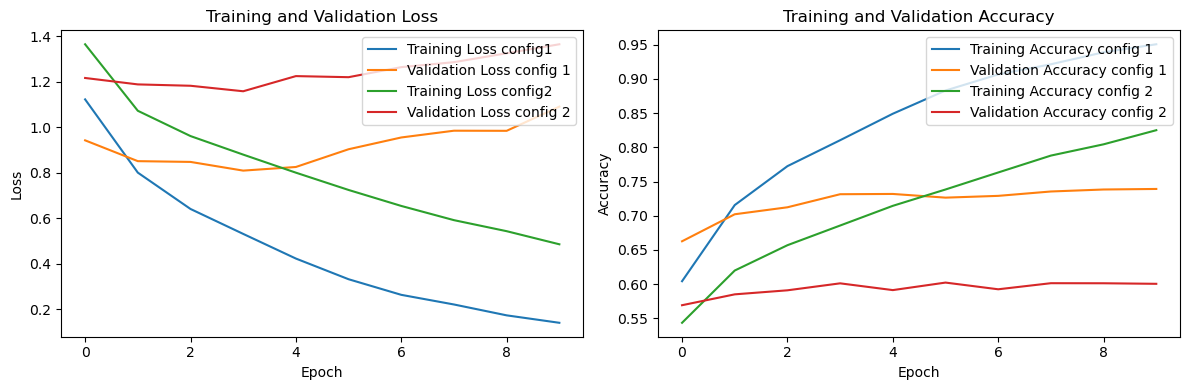

In [254]:
statsrecs = [alex_config1_statsrec, alex_config2_statsrec]
plot_statsrecs(statsrecs, 10)

> Comment: When using configuration 1, there are no frozen layers, which makes the training time very long, but can be seen obviously from the figure that all four data are better than using configuration 2. Configuration 1 has lower training set and validation set loss values, and higher training set and validation set accuracy.

> When using configuration 2, the training time is fast because it has frozen layers, but the performance of the model is also significantly lower than configuration 1.

### Part II: Image Captioning using RNN [30 marks]



### Motivation 

Through this part of assessment you will:

> 1. Understand the principles of text pre-processing and vocabulary building (provided).
> 2. Gain experience working with an image to text model.
> 3. Use and compare text similarity metrics for evaluating an image to text model, and understand evaluation challenges.

#### Dataset
This assessment will use a subset of the [COCO "Common Objects in Context" dataset](https://cocodataset.org/) for image caption generation. COCO contains 330K images, of 80 object categories, and at least five textual reference captions per image. Our subset consists of nearly 5070 of these images, each of which has five or more different descriptions of the salient entities and activities, and we will refer to it as COCO_5070.

To download the data:

> 1. **Images and annotations**: download the zipped file provided in the link here as [``COMP5625M_data_assessment_2.zip``](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/EWWzE-_AIrlOkvOKxH4rjIgBF_eUx8KDJMPKM2eHwCE0dg?e=DdX62H). 

``Info only:`` To understand more about the COCO dataset you can look at the [download page](https://cocodataset.org/#download). We have already provided you with the "2017 Train/Val annotations (241MB)" but our image subset consists of fewer images compared to orginial COCO dataset. So, no need to download anything from here! 

> 2. **Image meta data**: as our set is a subset of full COCO dataset, we have created a CSV file containing relevant meta data for our particular subset of images. You can download it also from Drive, "coco_subset_meta.csv" at the same link as 1.

#### Submission

You can either submit the same file or make a two separate .ipython notebook files zipped in the submission (please name as ``yourstudentusername_partI.ipynb`` and ``yourstudentusername_partII.ipynb``). 

**Final note:**

> **Please include in this notebook everything that you would like to be marked, including figures. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


The basic principle of our image-to-text model is as pictured in the diagram below, where an Encoder network encodes the input image as a feature vector by providing the outputs of the last fully-connected layer of a pre-trained CNN (we use [ResNet50](https://arxiv.org/abs/1512.03385)). This pretrained network has been trained on the complete ImageNet dataset and is thus able to recognise common objects. 

You can alternatively use the COCO trained pretrained weights from [PyTorch](https://pytorch.org/vision/stable/models.html). One way to do this is use the "FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1" but use e.g., "resnet_model = model.backbone.body". Alternatively, you can use the checkpoint from your previous coursework where you fine-tuned to COCO dataset. 

These features are then fed into a Decoder network along with the reference captions. As the image feature dimensions are large and sparse, the Decoder network includes a linear layer which downsizes them, followed by *a batch normalisation layer to speed up training*. Those resulting features, as well as the reference text captions, are then passed into a recurrent network (we will use an **RNNs** in this assessment). 

The reference captions used to compute loss are represented as numerical vectors via an **embedding layer** whose weights are learned during training.

<!-- ![Encoder Decoder](comp5625M_figure.jpg) -->

<div>
<center><img src="comp5625M_figure.jpg" width="1000"/></center>
</div>


### Instructions for creating vocabulary 

A helper function file ``helperDL.py`` is provided that includes all the functions that will do the following for you. You can easily import these functions in the exercise, most are already done for you!  

> 1. Extracting image features (a trained checkpoint is provided ``resnet50_caption.pt`` for you to download and use it for training your RNN)
> 2. Text preparation of training and validation data is provided

In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.models as models
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


**Please refer to the submission section at the top of this notebook to prepare your submission.**


In [3]:
# Load the feature map provided to you
# features_map = torch.load('coco_features_'+(device.type)+'.pt', map_location=device)
features_map = torch.load('resnet50_caption.pt', map_location=device) 

#### 5 Train DecoderRNN [20 marks]

> 5.1 Design a RNN-based decoder (10 marks)

> 5.2 Train your model with precomputed features (10 Marks)

##### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).


In [4]:
import json
import pandas as pd

with open('COMP5625M_data_assessment_2/coco/annotations2017/captions_train2017.json', 'r') as json_file:
    data = json.load(json_file)
    
df = pd.DataFrame.from_dict(data["annotations"])#dictionary convert to dataframe
df.head()

,image_id,id,caption
0,203564,37,A bicycle replica with a clock as the front wh...
1,322141,49,A room with blue walls and a white sink and door.
2,16977,89,A car that seems to be parked illegally behind...
3,106140,98,A large passenger airplane flying through the ...
4,106140,101,There is a GOL plane taking off in a partly cl...


In [5]:
coco_subset = pd.read_csv("COMP5625M_data_assessment_2/coco_subset_meta.csv")
new_data = pd.DataFrame( data['annotations'])
new_coco = coco_subset.rename(columns={'id':'image_id'})
new_coco.drop_duplicates('file_name',keep='first',inplace=True)

new_subset = new_data.sort_values(['image_id'], ascending=True)
# Get all the reference captions
new_file = pd.merge(new_coco,new_subset,how = 'inner', on = 'image_id')
new_file = new_file[['image_id','id','caption','file_name']]
new_file = new_file.sort_values(['image_id'], ascending = True)
new_file.head(10)

,image_id,id,caption,file_name
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg
16758,9,663627,there are containers filled with different kin...,000000000009.jpg
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg


In [8]:
# getting the clearn clean - e.g., converting all uppercases to lowercases
new_file["clean_caption"] = ""
from helperDL import gen_clean_captions_df
new_file = gen_clean_captions_df(new_file)
new_file.head(10)

,image_id,id,caption,file_name,clean_caption
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg,closeup of bins of food that include broccoli ...
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg,a meal is presented in brightly colored plasti...
16758,9,663627,there are containers filled with different kin...,000000000009.jpg,there are containers filled with different kin...
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg,colorful dishes holding meat vegetables fruit ...
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg,a bunch of trays that have different food
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg,a giraffe mother with its baby in the forest
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg,a giraffe standing up nearby a tree
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg,two giraffes standing in a tree filled area
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg,a giraffe standing next to a forest filled wit...
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg,a giraffe eating food from the top of the tree


In [10]:
##### Spilt your training, validation and test dataset with indexes to each set
from helperDL import split_ids
train_id, valid_id, test_id = split_ids(new_file['image_id'].unique())
print("training:{}, validation:{}, test:{}".format(len(train_id), len(valid_id), len(test_id)))

training:3547, validation:506, test:1015


In [11]:
train_set = new_file.loc[new_file['image_id'].isin(train_id)]
valid_set = new_file.loc[new_file['image_id'].isin(valid_id)]
test_set = new_file.loc[new_file['image_id'].isin(test_id)]
test_set

,image_id,id,caption,file_name,clean_caption
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg,closeup of bins of food that include broccoli ...
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg,a meal is presented in brightly colored plasti...
16758,9,663627,there are containers filled with different kin...,000000000009.jpg,there are containers filled with different kin...
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg,colorful dishes holding meat vegetables fruit ...
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg,a bunch of trays that have different food
...,...,...,...,...,...
7325,581929,613045,Two brown horses in a pasture eating grass.,000000581929.jpg,two brown horses in a pasture eating grass
7324,581929,601057,two brown horses grazing in a fenced off field,000000581929.jpg,two brown horses grazing in a fenced off field
7323,581929,612316,Two horses are grazing in a green field.,000000581929.jpg,two horses are grazing in a green field
7322,581929,597256,a horse is standing in a green field,000000581929.jpg,a horse is standing in a green field


In [12]:
class Vocabulary(object):
    """ Simple vocabulary wrapper which maps every unique word to an integer ID. """
    def __init__(self):
        # intially, set both the IDs and words to dictionaries with special tokens
        self.word2idx = {'<pad>': 0, '<unk>': 1, '<end>': 2}
        self.idx2word = {0: '<pad>', 1: '<unk>', 2: '<end>'}
        self.idx = 3

    def add_word(self, word):
        # if the word does not already exist in the dictionary, add it
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            # increment the ID for the next word
            self.idx += 1

    def __call__(self, word):
        # if we try to access a word not in the dictionary, return the id for <unk>
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [13]:
### build vocabulariy for each set - train, val and test 
# you will be using to create dataloaders
from helperDL import build_vocab
# build_vocab mapping the id and vocabulary

# create a vocab instance
vocab = Vocabulary()
vocab_train = build_vocab(train_id, new_file, vocab)
vocab_valid = build_vocab(valid_id, new_file, vocab)
vocab_test = build_vocab(test_id, new_file, vocab)

vocab = vocab_train # using only training samples as vocabulary as instructed above
print("Total vocabulary size: {}".format(len(vocab_train)))
print(vocab_test .word2idx)

Total vocabulary size: 2373
{'<pad>': 0, '<unk>': 1, '<end>': 2, 'a': 3, 'woman': 4, 'is': 5, 'holding': 6, 'grey': 7, 'and': 8, 'black': 9, 'hair': 10, 'dryer': 11, 'in': 12, 'floral': 13, 'shirt': 14, 'bla...': 15, 'person': 16, 'ball': 17, 'wearing': 18, 'glasses': 19, 'holds': 20, 'blo...': 21, 'while': 22, 'Name:': 23, 'clean_caption,': 24, 'dtype:': 25, 'object': 26, 'stretching': 27, 'to': 28, 'hit': 29, 'with': 30, 'the': 31, 'racket': 32, 'male': 33, 'tennis': 34, 'player': 35, 'white': 36, 'playing': 37, '...': 38, 'on': 39, 'court': 40, 'lady': 41, 'blue': 42, 'watches': 43, 'as': 44, 'man': 45, 'racquet': 46, 'his': 47, 'left': 48, 'hand': 49, 'laptop': 50, 'set': 51, 'wooden': 52, 'stand': 53, 'computer': 54, 'of': 55, 'some': 56, 'an': 57, 'apple': 58, 'rests': 59, 'custom': 60, 'sitting': 61, 'top': 62, 'desk': 63, 'table': 64, 'pizza': 65, 'from': 66, 'oven': 67, 'several': 68, 'photographs': 69, 'it...': 70, 'smiling': 71, 'about': 72, 'she': 73, 'pan': 74, 'taking': 7

In [14]:
# They can also join the train and valid captions but they will need to run vocabulary after concatenation
import numpy as np
vocab = build_vocab(np.concatenate((train_id, valid_id), axis=0), new_file, vocab) #---> overrighting
len(vocab)

2545

Instantiate a ```DataLoader``` for your image feature and caption dataset. ``helperDL.py`` file includes all the required functions

We need to overwrite the default PyTorch collate_fn() because our 
ground truth captions are sequential data of varying lengths. The default
collate_fn() does not support merging the captions with padding.

You can read more about it here:
https://pytorch.org/docs/stable/data.html#dataloader-collate-fn. 


In [15]:
from helperDL import EncoderCNN  
model = EncoderCNN() 
print(model)

C:\Users\18375\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\18375\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EncoderCNN(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64

In [16]:
# ''' Load the saved image feature maps and trained model ("provided to you") '''

# # ---> your entry here (make sure that the path is correct)
# features = torch.load("coco_features.pt")
# # features_map = torch.load('resnet50_caption.pt', map_location=device) 
# # also load the model ckpt and udate the model state dict of the base model
# # ---> your entry here (make sure that the path is correct)
# checkpoint = torch.load("ckpt file here") 
# model.load_state_dict(checkpoint['model_state_dict'])

In [261]:
##### Preparing the train, val and test dataloaders
from helperDL import COCO_Features
from helperDL import caption_collate_fn


# Create a dataloader for train
dataset_train = COCO_Features(
    df=train_set,
    vocab=vocab,
    features=features_map,
)

train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

# Create a dataloader for valid
dataset_valid = COCO_Features(
    df=valid_set,
    vocab=vocab,
    features=features_map,
)

valid_loader = torch.utils.data.DataLoader(
    dataset_valid,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

In [262]:
# say this is as below 
# --> Please change these numbers as required. 
# --> Please comment on changes that you do.
EMBED_SIZE = 256
HIDDEN_SIZE = 512
NUM_LAYERS = 1
LR = 0.001
NUM_EPOCHS = 5
LOG_STEP = 10
SAVE_STEP = 10
MAX_SEQ_LEN = 37

#### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).

In [300]:
class DecoderRNN(nn.Module):
    def __init__(self, vocab_size, embed_size=256, hidden_size=512, num_layers=1, max_seq_length=47):
        """Set the hyper-parameters and build the layers."""
        super(DecoderRNN, self).__init__()
        # we want a specific output size, which is the size of our embedding, so
        # we feed our extracted features from the last fc layer (dimensions 1 x 2048)
        # into a Linear layer to resize
        # your code
        self.resize = nn.Linear(2048, embed_size)
        
        # batch normalisation helps to speed up training
        # your code
        self.bn = nn.BatchNorm1d(embed_size)# or 2d

        # your code for embedding layer
        self.embed = nn.Embedding(vocab_size, embed_size)

        # your code for RNN
#  
        self.rnn = nn.RNN(embed_size, hidden_size, num_layers, batch_first=True)
   

        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length
        

    def forward(self, features, captions, lengths):
        """Decode image feature vectors and generates captions."""
        embeddings = self.embed(captions)
        im_features = self.resize(features)
        im_features = self.bn(im_features)
        
        # compute your feature embeddings
        # your code
        embeddings = torch.cat((im_features.unsqueeze(1), embeddings), 1)

    
        # pack_padded_sequence returns a PackedSequence object, which contains two items: 
        # the packed data (data cut off at its true length and flattened into one list), and 
        # the batch_sizes, or the number of elements at each sequence step in the batch.
        # For instance, given data [a, b, c] and [x] the PackedSequence would contain data 
        # [a, x, b, c] with batch_sizes=[2,1,1].

        # your code [hint: use pack_padded_sequence]
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True)
        hidden, _ = self.rnn(packed)
        outputs, _ = pad_packed_sequence(hidden, batch_first=True)
        outputs = self.linear(outputs)
        return outputs
    
    
    def sample(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []

        inputs = self.bn(self.resize(features)).unsqueeze(1)
        for i in range(self.max_seq_length):
            hiddens, states = self.rnn(inputs, states)  # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))   # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)               # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)              # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1)                # inputs: (batch_size, 1, embed_size)
        sampled_ids = torch.stack(sampled_ids, 1)       # sampled_ids: (batch_size, max_seq_length)
        return sampled_ids


In [301]:
# instantiate decoder
decoder = DecoderRNN(len(vocab), embed_size=EMBED_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS).to(device)

##### 5.2 Train your model with precomputed features (10 marks)

Train the decoder by passing the features, reference captions, and targets to the decoder, then computing loss based on the outputs and the targets. Note that when passing the targets and model outputs to the loss function, the targets will also need to be formatted using ```pack_padded_sequence()```.

We recommend a batch size of around 64 (though feel free to adjust as necessary for your hardware).

**We strongly recommend saving a checkpoint of your trained model after training so you don't need to re-train multiple times.**

Display a graph of training and validation loss over epochs to justify your stopping point.

In [302]:
# loss and optimizer here
# your code here --->
rnn_loss = nn.CrossEntropyLoss()
rnn_optimizer = torch.optim.Adam(decoder.parameters(), lr=0.001)


# train the models
total_step = len(train_loader)
total_step_v = len(valid_loader)
stats = np.zeros((NUM_EPOCHS,2))
print(stats.shape)
total_loss = 0
decoder.train()
for epoch in range(NUM_EPOCHS):
    for i, (features_, captions_, lengths_) in enumerate(train_loader):
        # your code here --->
        features_ = features_.to(device) 
        captions_ = captions_.to(device)
        rnn_optimizer.zero_grad()
        target = pack_padded_sequence(captions_, lengths_, batch_first=True).data
        output = decoder(features_, captions_, lengths_)
        output = pack_padded_sequence(output, lengths_, batch_first=True).data
        loss = rnn_loss(output, target)

        loss.backward()
        rnn_optimizer.step()
  
        total_loss += loss.item()

        # print stats
        if i % LOG_STEP == 0:
            print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i}/{total_step}], Loss: {loss.item():.4f}")
#         if (i+1) % SAVE_STEP == 0
            
    
    stats[epoch,0] = round(total_loss/total_step,3)
    total_loss = 0
    
    decoder.eval()
    with torch.no_grad():  
        for i, (features_, captions_, lengths_) in enumerate(valid_loader):
            # your code here --->
            features_ = features_.to(device) 
            captions_ = captions_.to(device)
            target = pack_padded_sequence(captions_, lengths_, batch_first = True).data
            output = decoder(features_, captions_, lengths_)
            output = pack_padded_sequence(output, lengths_, batch_first=True).data
            loss = rnn_loss(output, target)
            total_loss += loss.item()

            
    stats[epoch,1] = round(total_loss/total_step_v,3)
    total_loss = 0
    # print stats
    print("="*30)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Train_Loss: {stats[epoch,0]}, Valid_Loss: {stats[epoch,1]}")
    print("="*30)
    decoder.train()
torch.save({"state_dict": decoder.state_dict(), "stats": stats}, rnn_saveCkpt)


(5, 2)
Epoch [1/5], Step [0/555], Loss: 7.8635
Epoch [1/5], Step [10/555], Loss: 5.9323
Epoch [1/5], Step [20/555], Loss: 5.8415
Epoch [1/5], Step [30/555], Loss: 5.2553
Epoch [1/5], Step [40/555], Loss: 4.8373
Epoch [1/5], Step [50/555], Loss: 4.9974
Epoch [1/5], Step [60/555], Loss: 4.5994
Epoch [1/5], Step [70/555], Loss: 4.3405
Epoch [1/5], Step [80/555], Loss: 4.3578
Epoch [1/5], Step [90/555], Loss: 4.4459
Epoch [1/5], Step [100/555], Loss: 4.4296
Epoch [1/5], Step [110/555], Loss: 4.3205
Epoch [1/5], Step [120/555], Loss: 4.3534
Epoch [1/5], Step [130/555], Loss: 3.8235
Epoch [1/5], Step [140/555], Loss: 3.8727
Epoch [1/5], Step [150/555], Loss: 3.8435
Epoch [1/5], Step [160/555], Loss: 3.8682
Epoch [1/5], Step [170/555], Loss: 3.8188
Epoch [1/5], Step [180/555], Loss: 3.9156
Epoch [1/5], Step [190/555], Loss: 3.9305
Epoch [1/5], Step [200/555], Loss: 3.7237
Epoch [1/5], Step [210/555], Loss: 3.4243
Epoch [1/5], Step [220/555], Loss: 3.9566
Epoch [1/5], Step [230/555], Loss: 3.7

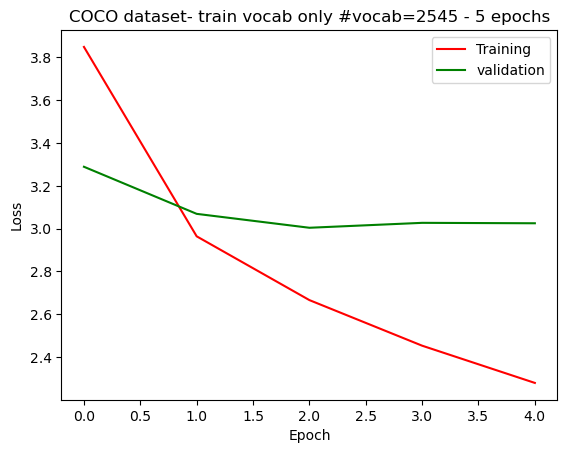

In [303]:
fig = plt.figure()

plt.plot(stats[:,0], 'r', label = 'Training', )
plt.plot(stats[:,1], 'g', label = 'validation' )
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f"COCO dataset- train vocab only #vocab={len(vocab)} - 5 epochs")
fig.savefig("coco_train_vocab_only.png")
plt.show()

> When training the model, the training loss and verification loss decrease to a certain extent after each epoch. This is because the performance of the model is constantly improving. 
> We can choose to stop training at ```epoch=2 to 3```. Because it can be seen from the graph that the velidation loss of the model tends to be stable at this time, which shows that the performance of the model will not improve significantly despite further training.

In [305]:
# save model after training
decoder_ckpt = torch.save(decoder, "coco_subset_assessment_decoder.ckpt")

### 6 Test prediction and evaluation [10 marks] 

#### 6.1 Generate predictions on test data (4 marks)

Display 4 sample test images containing different objects, along with your model’s generated captions and all the reference captions for each.

> Remember that everything **displayed** in the submitted notebook and .html file will be marked, so be sure to run all relevant cells.

In [306]:
class COCOImagesDataset(Dataset):
    def __init__(self, df, transform):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        filename = self.df.iloc[idx]['file_name']
        img_path = os.path.join("COMP5625M_data_assessment_2/coco/images",filename)
        img = Image.open(img_path)
        img = img.convert('RGB')
        img = self.transform(img)
        return img, filename


In [138]:
test_set.head(10)

,image_id,id,caption,file_name,clean_caption
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg,closeup of bins of food that include broccoli ...
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg,a meal is presented in brightly colored plasti...
16758,9,663627,there are containers filled with different kin...,000000000009.jpg,there are containers filled with different kin...
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg,colorful dishes holding meat vegetables fruit ...
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg,a bunch of trays that have different food
181,61,446671,SOME PEOPLE IN THE WOODS RIDING TWO ELEPHANTS,000000000061.jpg,some people in the woods riding two elephants
182,61,455584,Several elephants in the jungle carrying peopl...,000000000061.jpg,several elephants in the jungle carrying peopl...
183,61,452062,Some people who are riding on top of elephants.,000000000061.jpg,some people who are riding on top of elephants
180,61,444409,They are brave for riding in the jungle on tho...,000000000061.jpg,they are brave for riding in the jungle on tho...
184,61,452272,there are people riding elephants in the middl...,000000000061.jpg,there are people riding elephants in the middl...


In [307]:
data_transform = transforms.Compose([ 
    transforms.Resize(224),     
    transforms.CenterCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),   # using ImageNet norms
                         (0.229, 0.224, 0.225))])

dataset_test = COCOImagesDataset(
    df=test_set,
    transform=data_transform,
)
test_loader = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=32,
    shuffle=False,
    num_workers=0)

the shape of each picture: torch.Size([3, 224, 224])


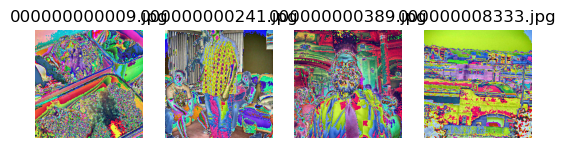

In [308]:
sample=next(iter(test_loader))

print("the shape of each picture: {}".format(sample[0][0].shape))
for sample,i in zip(test_loader,range(4)):
    image = transforms.ToPILImage()(sample[0][0])
    ax = plt.subplot(1,4,i+1)
    ax.axis('off')
    plt.imshow(image)
    ax.set_title(sample[1][0])

In [309]:
model.eval()
decoder.eval() # generate caption, eval mode to not influence batchnormncoder.eval()

DecoderRNN(
  (resize): Linear(in_features=2048, out_features=256, bias=True)
  (bn): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (embed): Embedding(2545, 256)
  (rnn): RNN(256, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=2545, bias=True)
)

In [310]:
# getting functions from helperDL.py
from helperDL import timshow
from helperDL import decode_caption

000000000009.jpg
GENERATED: 

a plate of food and some broccoli and <unk>
REFERENCES: 

Closeup of bins of food that include broccoli and bread.
A meal is presented in brightly colored plastic trays.
there are containers filled with different kinds of foods
Colorful dishes holding meat, vegetables, fruit, and bread.
A bunch of trays that have different food.



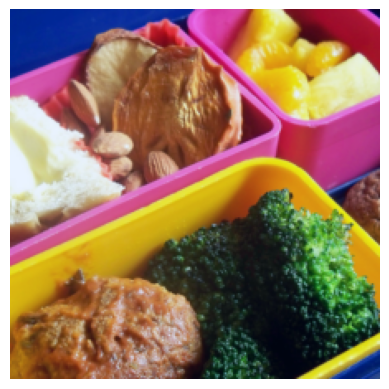

000000000241.jpg
GENERATED: 

a group of young children playing a game of tennis
REFERENCES: 

people sitting around watching a man playing a video game
A man standing on a piece of equipment for a video game while holding the remote as four other people look on
The group of friends is enjoyingplaying the video games.
Young adult using video game controller with other looking on.
a man standing holding a game controller and two people sitting



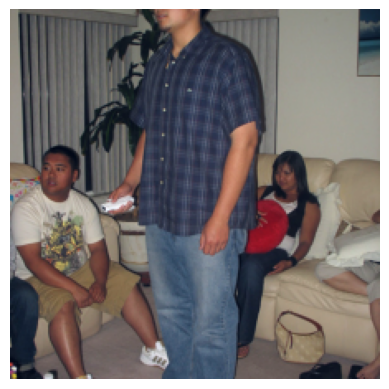

000000000389.jpg
GENERATED: 

a man and a woman standing next to a woman
REFERENCES: 

The man smiles wearing a green neck tie near a crowd of people. 
A man with a long grey beard in a white shirt and green tie at a pub full of green-shirted patrons.
A woman standing in a large group of people near stairs.
This man is very happy to be at the gathering.
A man with a bushy beard and green tie.



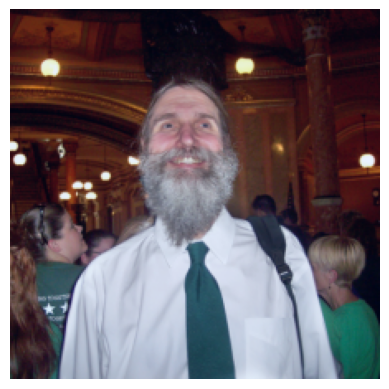

000000008333.jpg
GENERATED: 

a red and white airplane parked on the runway
REFERENCES: 

A white and red train traveling over a city.
A red and white train riding through a city on elevated tracks.
A Virgin Mobile train driving in the middle of a city.
A modern commuter train travels through the city
A passenger train that is going over a bridge.



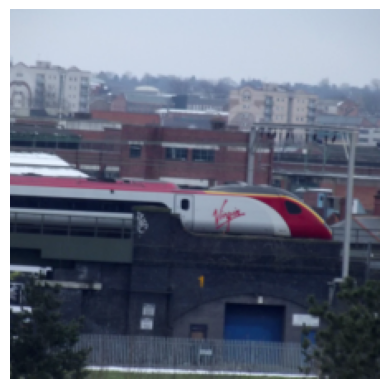

In [313]:
IMAGES_TO_SHOW = 4
idx = 0

model = model.to(device)
decoder = decoder.to(device)

decoder = torch.load("coco_subset_assessment_decoder.ckpt")

generated_captions = {}
with torch.no_grad():
    for i, (image,filename) in enumerate(test_loader):
        # your code here --->
        img = image.to(device)
        feature = model(img)
        sample_id = decoder.sample(feature)
        sample_id = sample_id[0].cpu().numpy()  
        
        #conver into words
        sample_sentence = decode_caption(sample_id,vocab)
        print(filename[0])
        print(f"GENERATED: \n")
        print(sample_sentence)

        print("REFERENCES: \n")
        ref_caption = test_set.loc[test_set['file_name'] == filename[0], 'caption']
        for ref in ref_caption:
            print(ref) 

        print("===================================\n")


        timshow(image[0].cpu())
        idx +=1
        if idx == IMAGES_TO_SHOW:
            break


#### 6.2 Caption evaluation using cosine similarity (6 marks)

The cosine similarity measures the cosine of the angle between two vectors in n-dimensional space. The smaller the angle, the greater the similarity.

To use the cosine similarity to measure the similarity between the generated caption and the reference captions: 

* Find the embedding vector of each word in the caption 
* Compute the average vector for each caption 
* Compute the cosine similarity score between the average vector of the generated caption and average vector of each reference caption
* Compute the average of these scores 

Calculate the cosine similarity using the model's predictions over the whole test set. 

Display a histogram of the distribution of scores over the test set.

In [314]:
import torch.nn.functional as F
def getsame_vectors_size(vectors_list):#set same size for the reference to process
    max_size = max(vec.size(0) for vec in vectors_list)
    adjusted_vectors = []
    for vec in vectors_list:
        current_size = vec.size(0)
        padding = max_size - vec.size(0)
        padded_vec = F.pad(vec, (0, 0, 0, padding), value=0)
        adjusted_vectors.append(padded_vec)
    return adjusted_vectors

In [315]:
def cosine_similarity(vec1, vec2):# compute cosine similarity
    dot = torch.dot(vec1, vec2)
    norm_vec1 = torch.norm(vec1)
    norm_vec2 = torch.norm(vec2)
    similarity = dot / (norm_vec1 * norm_vec2)
    return similarity

> This function is used to calculate cosine similarity. The parameters passed in are generated caption in the form of idx and a reference caption array (because each picture has multiple reference captions). Average them by calculating their embedding vectors separately using embedweight. Then calculate their cosine similarity.

In [319]:
# get the idx of reference caption
# sample_id = genereated idx, reference_caption = reference caption
def calculate_cosine(sample_id,reference_caption,vocab,embedweight):
    ref_idx_list = []
    word_to_idx = {word: idx for word, idx in vocab.word2idx.items()}#mapping dictionary
    for i in reference_caption:#convert the reference to idx
        words = i.split(" ")
        word_indices = [word_to_idx.get(word, word_to_idx['<unk>']) for word in words]
        ref_idx_list.append(word_indices)
    

    # compute the embedding vector of genereate and reference caption
    gen_embed = embedweight[torch.tensor(sample_id)]#genereated embed
    ref_embed_list = []
    for i in ref_idx_list:# all reference idx list
        ref_embed_list.append(embedweight[torch.tensor(i)]) #all reference embedding
    ref_embed_list = getsame_vectors_size(ref_embed_list)# adjust the size of reference embedding vector

    # conver to tensor
    ref_embed = torch.stack(ref_embed_list)
    average_gen_embed = torch.mean(gen_embed, dim=0)#compute mean for generated caption
    average_ref_embed = torch.mean(ref_embed, dim=0)#compute mean for reference caption
    
    similarity = 0
    n = 0
    for ref_i in average_ref_embed:
        similarity += cosine_similarity(average_gen_embed, ref_i)
        n += 1
    return similarity/n



In [320]:
embedding_weight = decoder.embed.weight
idx = 0
model = model.to(device)
decoder = decoder.to(device)
decoder = torch.load("coco_subset_assessment_decoder.ckpt")
generated_captions = {}# store the generated_cations

scorelist = []
genereate_idx = []

with torch.no_grad():
    total = 0
    batch = 0
    for i, (image, filename) in enumerate(test_loader):
        img = image.to(device)
        feature = model(img)
        sample_ids = decoder.sample(feature)
        sample_ids = sample_ids.cpu().numpy()
        for fil_name, sample_id in zip(filename, sample_ids): 
            sample_captions = sample_id
            generated_captions[fil_name] = sample_captions#ditionary for generated captions
        n = 0
        similarity=0
            
        for i in filename:
            reference_caption = new_file.loc[new_file['file_name'] == i , 'clean_caption'].values
#             print(reference_caption)
            similarity_one = calculate_cosine(generated_captions[i], reference_caption, vocab, embedding_weight)
            scorelist.append(similarity_one)
#             print("scorelist: {}".format(scorelist))
            similarity += similarity_one
            n+=1
        total += similarity/n
        batch +=1
    print(total/batch)
            
            

tensor(0.0616, device='cuda:0')


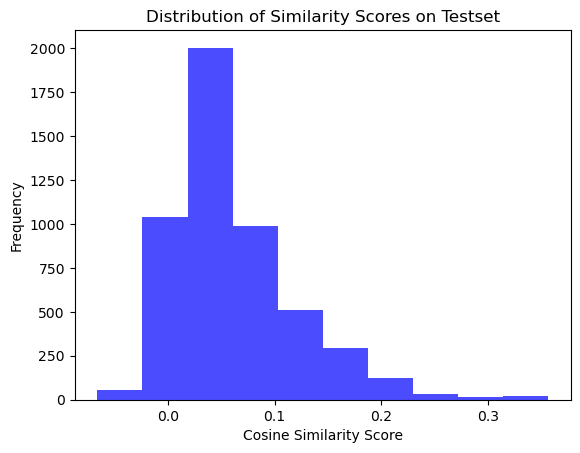

In [323]:
import numpy as np
import matplotlib.pyplot as plt


# Convert tensor list to numpy array
scores_array = np.array([score.item() for score in scorelist])

# Plot histogram
plt.hist(scores_array, bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Similarity Scores on Testset')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


> Comment: Most of the embedding vectors get a cosine similarity score of 0.05, mainly concentrated between the similarity scores of 0-0.1.

##### Thank you for completing the assessment - if you have any question, please ask on teams channel or attend lab sessions on Tuesdays and Wednesdays.